# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import time
import plotly
import seaborn as sns
from datetime import timedelta

# Read Datasets

In [2]:
sales_data = pd.read_excel("sales_data.xlsx")

In [3]:
backup = sales_data

# Data Description

In [4]:
sales_data = sales_data.drop_duplicates()

In [5]:
(sales_data.head())

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [106]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 10 columns):
transaction id           536641 non-null object
product id               536641 non-null object
product description      535187 non-null object
quantity sold            536641 non-null int64
transaction timestamp    536641 non-null datetime64[ns]
unit price               536641 non-null float64
customer id              401604 non-null float64
transaction country      536641 non-null object
Net Sales                536641 non-null float64
date                     536641 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 45.0+ MB
None


In [77]:
print(sales_data.describe())

       quantity sold     unit price    customer id      Net Sales
count  536641.000000  536641.000000  401604.000000  536641.000000
mean        9.620029       4.632656   15281.160818      18.123861
std       219.130156      97.233118    1714.006089     380.656263
min    -80995.000000  -11062.060000   12346.000000 -168469.600000
25%         1.000000       1.250000   13939.000000       3.750000
50%         3.000000       2.080000   15145.000000       9.870000
75%        10.000000       4.130000   16784.000000      17.400000
max     80995.000000   38970.000000   18287.000000  168469.600000


- Negative quantity and unit price corresponds to Cancelled Transactions

In [8]:
sales_data.isna().sum()

transaction id                0
product id                    0
product description        1454
quantity sold                 0
transaction timestamp         0
unit price                    0
customer id              135037
transaction country           0
dtype: int64

#### Missing Values

In [182]:
print("Number of Records : % 2d" %(len(sales_data))) 
print("Number of Transactions: %2d" %(np.count_nonzero(sales_data["transaction id"].unique())))
print("Missing Transaction Ids: %2d" %(sales_data["transaction id"].isna().sum()))
print("Number of Customer IDs: %2d" %(np.count_nonzero(sales_data["customer id"].unique())))
print("Missing Customer Ids: %2d" %(sales_data["customer id"].isna().sum()))
print("Number of Product IDs: %2d" %(np.count_nonzero(sales_data["product id"].unique())))
print("Missing Product Ids: %2d" %(sales_data["product id"].isna().sum()))
print("Number of Product Descriptions: %2d" %(np.count_nonzero(sales_data["product description"].unique())))
print("Missing Product Descriptions: %2d" %(sales_data["product description"].isna().sum()))
print("Average distinct products per transactions: %2f" %(len(sales_data)/np.count_nonzero(sales_data["transaction id"].unique())))
print("Percentage of records with NA customers: ", round(sales_data['customer id'].isnull().sum() * 100 / len(sales_data),2),"%" )

Number of Records :  536641
Number of Transactions: 25900
Missing Transaction Ids:  0
Number of Customer IDs: 4373
Missing Customer Ids: 135037
Number of Product IDs: 4070
Missing Product Ids:  0
Number of Product Descriptions: 4224
Missing Product Descriptions: 1454
Average distinct products per transactions: 199.324402
Percentage of records with NA customers:  25.16 %


- Data is unique at a Transaction ID - Product ID level

- No Missing Transactions or Product Informations

- Product Descriptions missing from around 1454 records

- On an average the data looks like from a wholesale retail company with average ~21 products per transactions

# EDA

#### Identifying Cancelled Transactions

In [78]:
cancelled = sales_data[sales_data['transaction id'].astype(str).str.contains('C')].sort_values('quantity sold', ascending=True)
print(cancelled.head())

       transaction id product id                  product description  \
540422        C581484      23843          PAPER CRAFT , LITTLE BIRDIE   
61624         C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR   
4287          C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR   
160145        C550456      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR   
160144        C550456      21175          GIN + TONIC DIET METAL SIGN   

        quantity sold transaction timestamp  unit price  customer id  \
540422         -80995   2011-12-09 09:27:00        2.08      16446.0   
61624          -74215   2011-01-18 10:17:00        1.04      12346.0   
4287            -9360   2010-12-02 14:23:00        0.03      15838.0   
160145          -3114   2011-04-18 13:08:00        2.10      15749.0   
160144          -2000   2011-04-18 13:08:00        1.85      15749.0   

       transaction country  Net Sales        date  
540422      United Kingdom  -168469.6  2011-12-09  
61624       United Kingd

- Negative quantity and unit price correspond to Cancelled Transactions

In [11]:
print ("Number of cancelled transactions: %2d" %cancelled['transaction id'].nunique())
print ("% of cancelled transactions: {:.2f}% ".format(cancelled['transaction id'].nunique()/sales_data['transaction id'].nunique()*100))

Number of cancelled transactions: 3836
% of cancelled transactions: 14.81% 


In [12]:
# Find total Sales
sales_data["Net Sales"] = sales_data["unit price"]*sales_data["quantity sold"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Weekday Analysis

In [107]:
import datetime
sales_data['day_of_week'] = pd.to_datetime(sales_data['date']).dt.day_name()
day_sales = sales_data.groupby('day_of_week')['Net Sales'].sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Transactions by Country

In [13]:
# Create a column with only the dates
sales_data["date"] = pd.to_datetime(sales_data['transaction timestamp']).apply(lambda x: x.date())
# Count of transactions per country
sls_country = sales_data.groupby(['transaction country'])['Net Sales'].sum()
sls_country = sls_country.to_frame()
sls_country.reset_index(level=0, inplace=True)
sls_country.columns = ["country", "Total Sales"]
sls_country = sls_country.sort_values('Total Sales', ascending=False)
print(sls_country)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                 country   Total Sales
36        United Kingdom  8.167128e+06
24           Netherlands  2.846615e+05
10                  EIRE  2.629934e+05
14               Germany  2.215095e+05
13                France  1.973171e+05
0              Australia  1.370098e+05
33           Switzerland  5.636305e+04
31                 Spain  5.475603e+04
3                Belgium  4.091096e+04
32                Sweden  3.658541e+04
20                 Japan  3.534062e+04
25                Norway  3.516346e+04
27              Portugal  2.930297e+04
12               Finland  2.232674e+04
6        Channel Islands  2.007639e+04
9                Denmark  1.876814e+04
19                 Italy  1.689051e+04
7                 Cyprus  1.285876e+04
1                Austria  1.015432e+04
16             Hong Kong  9.908240e+03
30             Singapore  9.120390e+03
18                Israel  7.901970e+03
26                Poland  7.213140e+03
37           Unspecified  4.740940e+03
15                Greece 

In [14]:
# selecting top 10 countries with most transactions
top_10_countries = sls_country.sort_values('Total Sales',ascending = False).head(15)
print(top_10_countries)
print(type(top_10_countries))

            country   Total Sales
36   United Kingdom  8.167128e+06
24      Netherlands  2.846615e+05
10             EIRE  2.629934e+05
14          Germany  2.215095e+05
13           France  1.973171e+05
0         Australia  1.370098e+05
33      Switzerland  5.636305e+04
31            Spain  5.475603e+04
3           Belgium  4.091096e+04
32           Sweden  3.658541e+04
20            Japan  3.534062e+04
25           Norway  3.516346e+04
27         Portugal  2.930297e+04
12          Finland  2.232674e+04
6   Channel Islands  2.007639e+04
<class 'pandas.core.frame.DataFrame'>


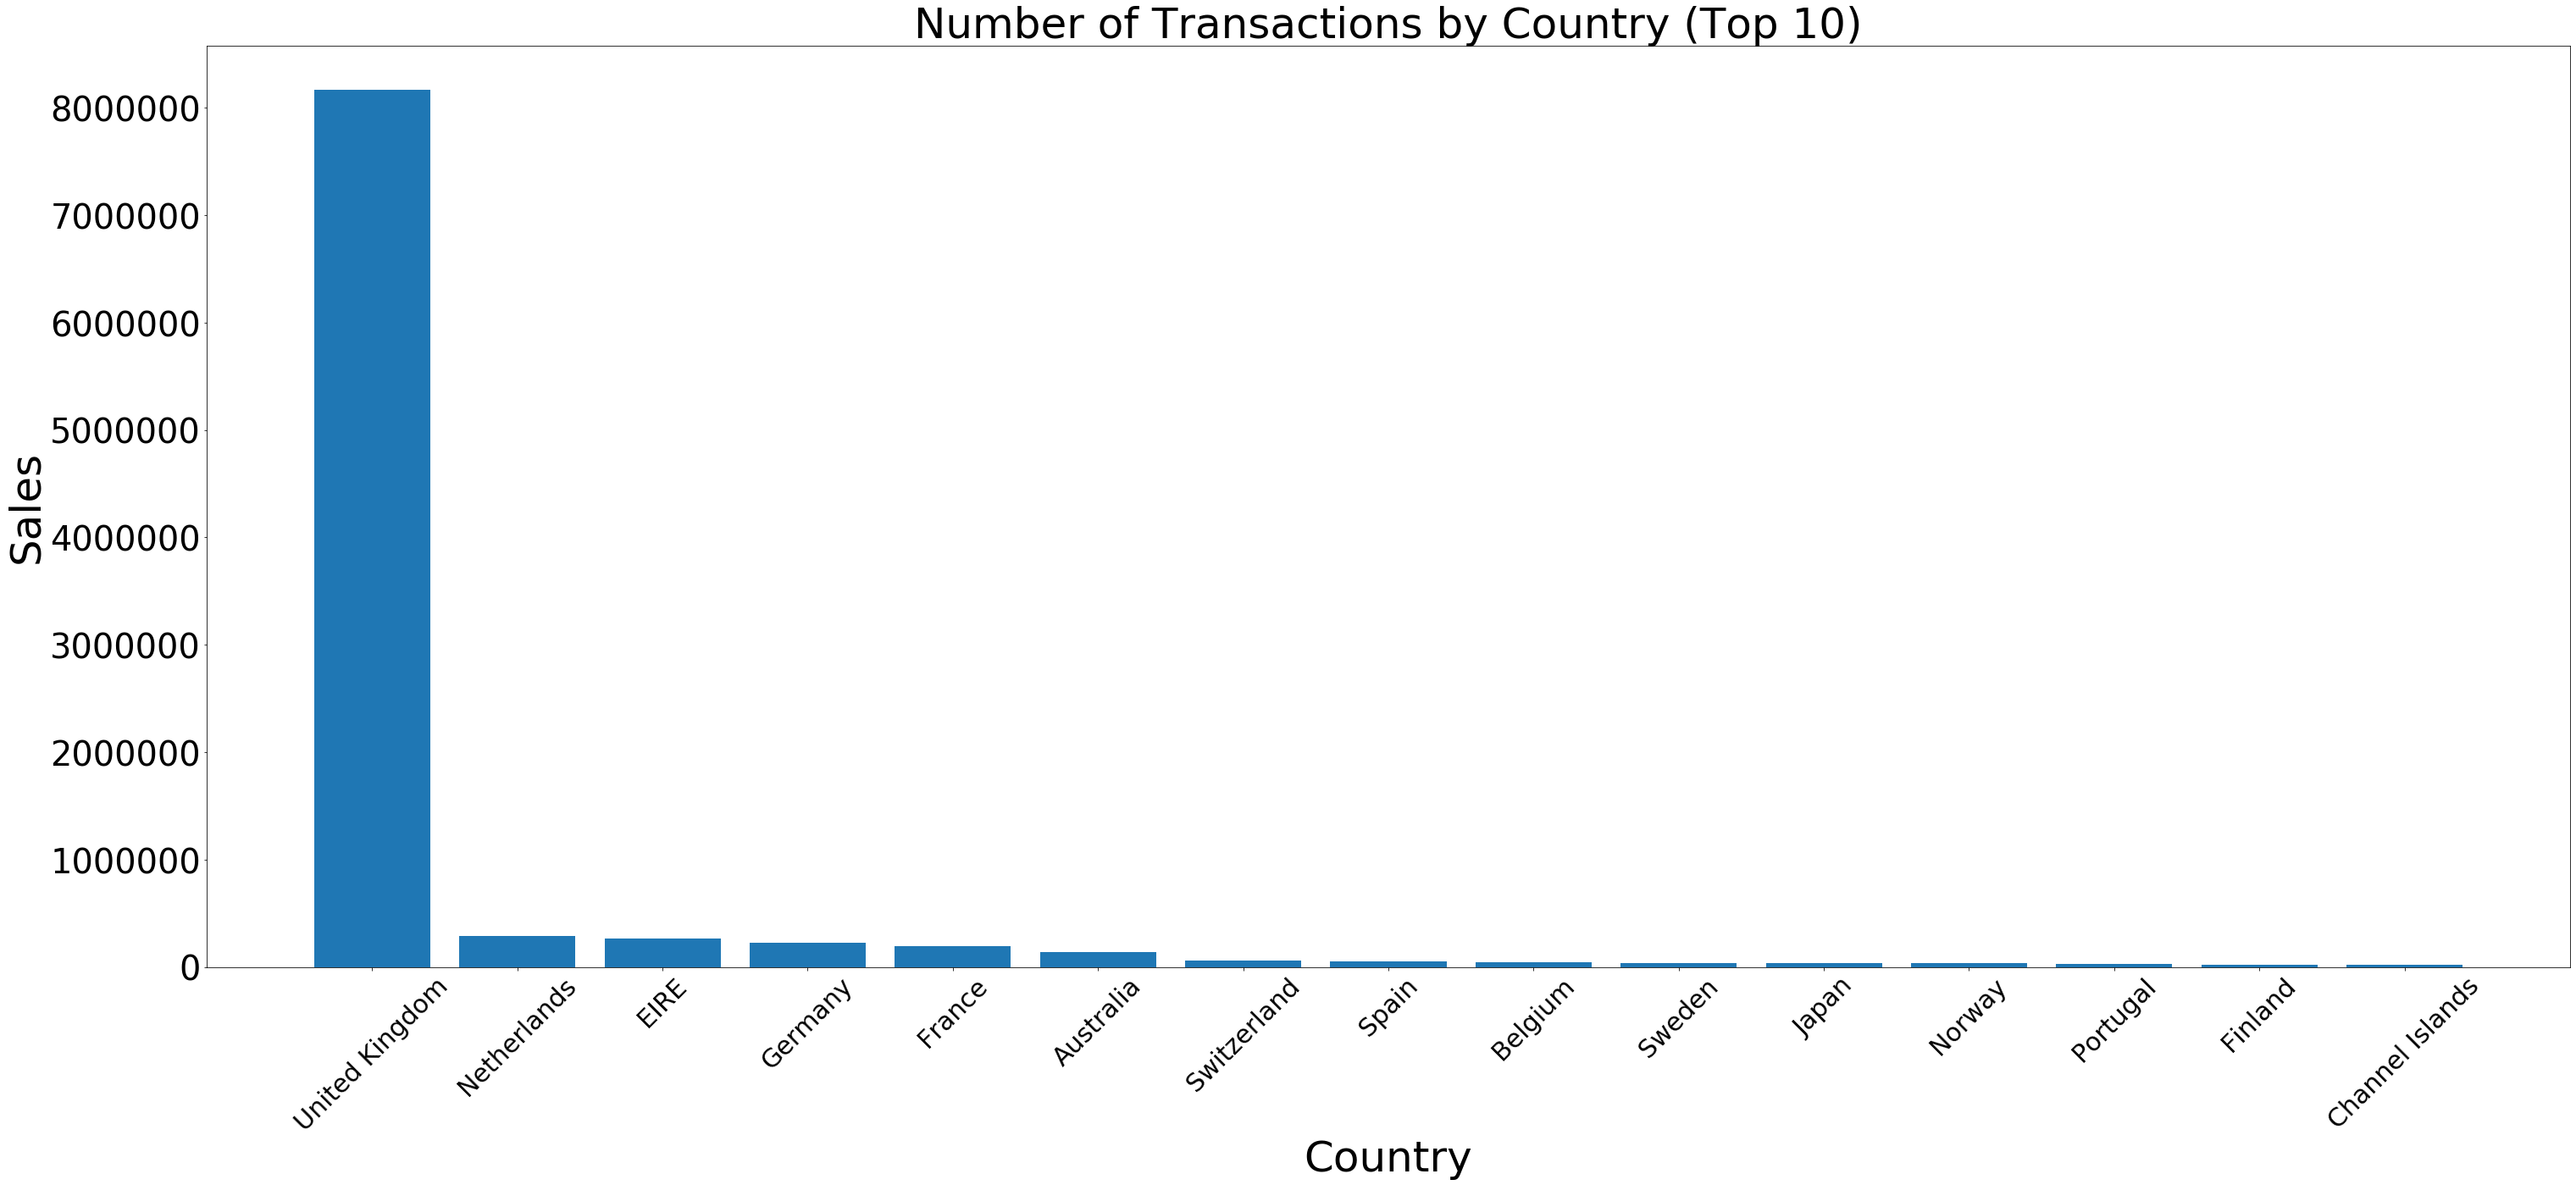

In [15]:
# plot the country vs Number of Transactions bar chart
plt.rcParams["figure.figsize"] = (50,20)
plt.bar(x = top_10_countries["country"], height = top_10_countries["Total Sales"])
plt.title("Number of Transactions by Country (Top 10)", fontsize = 50)
plt.ylabel("Sales", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Country", fontsize = 50)
plt.show()

In [16]:
sales_data.groupby('transaction country').sum().sort_values(by='Net Sales', ascending=False)

,quantity sold,unit price,customer id,Net Sales
transaction country,,,,
United Kingdom,4250328,2.233248e+06,5.544907e+09,8.167128e+06
Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05
EIRE,142495,4.840037e+04,1.102464e+08,2.629934e+05
Germany,117341,3.763344e+04,1.198819e+08,2.215095e+05
France,110438,4.298598e+04,1.074419e+08,1.973171e+05
Australia,83643,4.048000e+03,1.568057e+07,1.370098e+05
Switzerland,30313,6.795590e+03,2.377592e+07,5.636305e+04
Spain,26817,1.262150e+04,3.262673e+07,5.475603e+04
Belgium,23152,7.540130e+03,2.571829e+07,4.091096e+04


In [17]:
print('% of customers from UK: {:.2f}%'.format(sales_data[sales_data['transaction country']=='United Kingdom']['customer id'].nunique()/sales_data['customer id'].nunique()*100))

% of customers from UK: 90.35%


- Majority of Sales is happening only from United Kingdom, which is far more than the 2nd, 3rd and 4th countries (Netherlands, Ireland and Germany Respectively
- Also majority of customer IDs are from UK, comprising of about 90% of all te Customer IDs 
- The analysis after this will be more focused on the data from United Kingdom

#### Most Selling Products

In [18]:
# Products with most Sales
prd_df = sales_data[~sales_data['transaction id'].astype(str).str.contains('C')]
prd_df = prd_df.groupby(['product id'])['Net Sales'].sum()
# prd_df = trans_country.to_frame()
prd_df = prd_df.reset_index()
prd_df.columns = ["product id", "sales"]

In [19]:
top_10_products = prd_df.sort_values('sales',ascending = False).head(10)

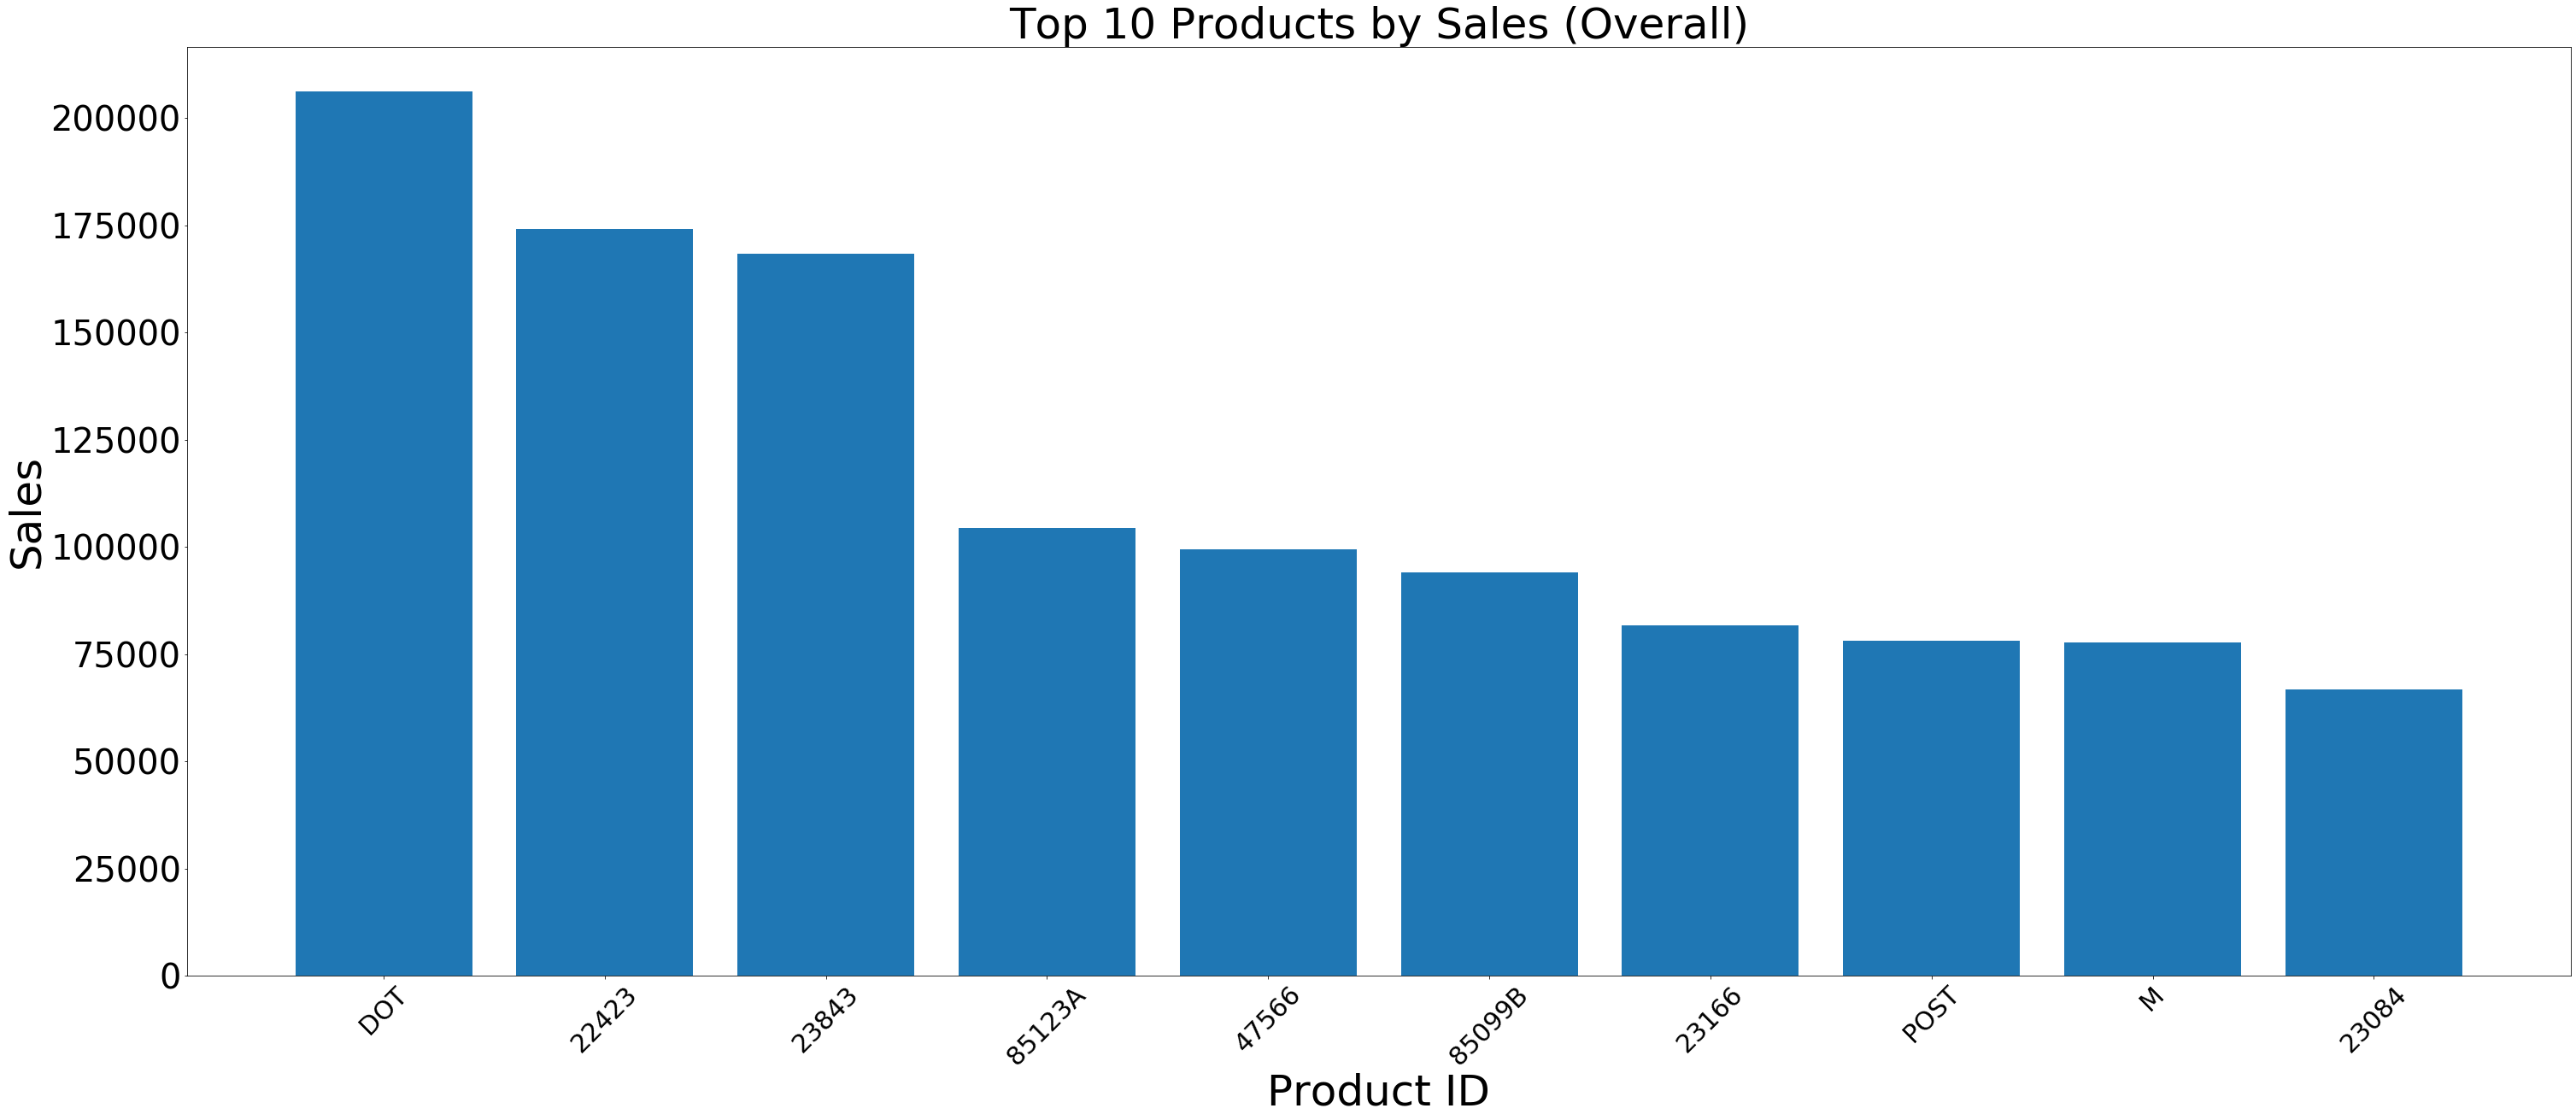

In [20]:
plt.rcParams["figure.figsize"] = (50,20)
plt.bar(x = top_10_products["product id"].astype(str), height = top_10_products["sales"])
plt.title("Top 10 Products by Sales (Overall)", fontsize = 50)
plt.ylabel("Sales", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Product ID", fontsize = 50)
plt.show()

# Company Performance

#### Sales Trend (Normal and Moving Average) 

In [23]:
sales_data['date'] = pd.to_datetime(sales_data['transaction timestamp']).apply(lambda x: x.date())
sales_trend = sales_data.groupby(['date'])['Net Sales'].sum()
sales_trend = sales_trend.reset_index()
sales_trend.columns = ["date", "sales"]
sales_trend['sales_ma7'] = sales_trend.iloc[:,1].rolling(window=7).mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


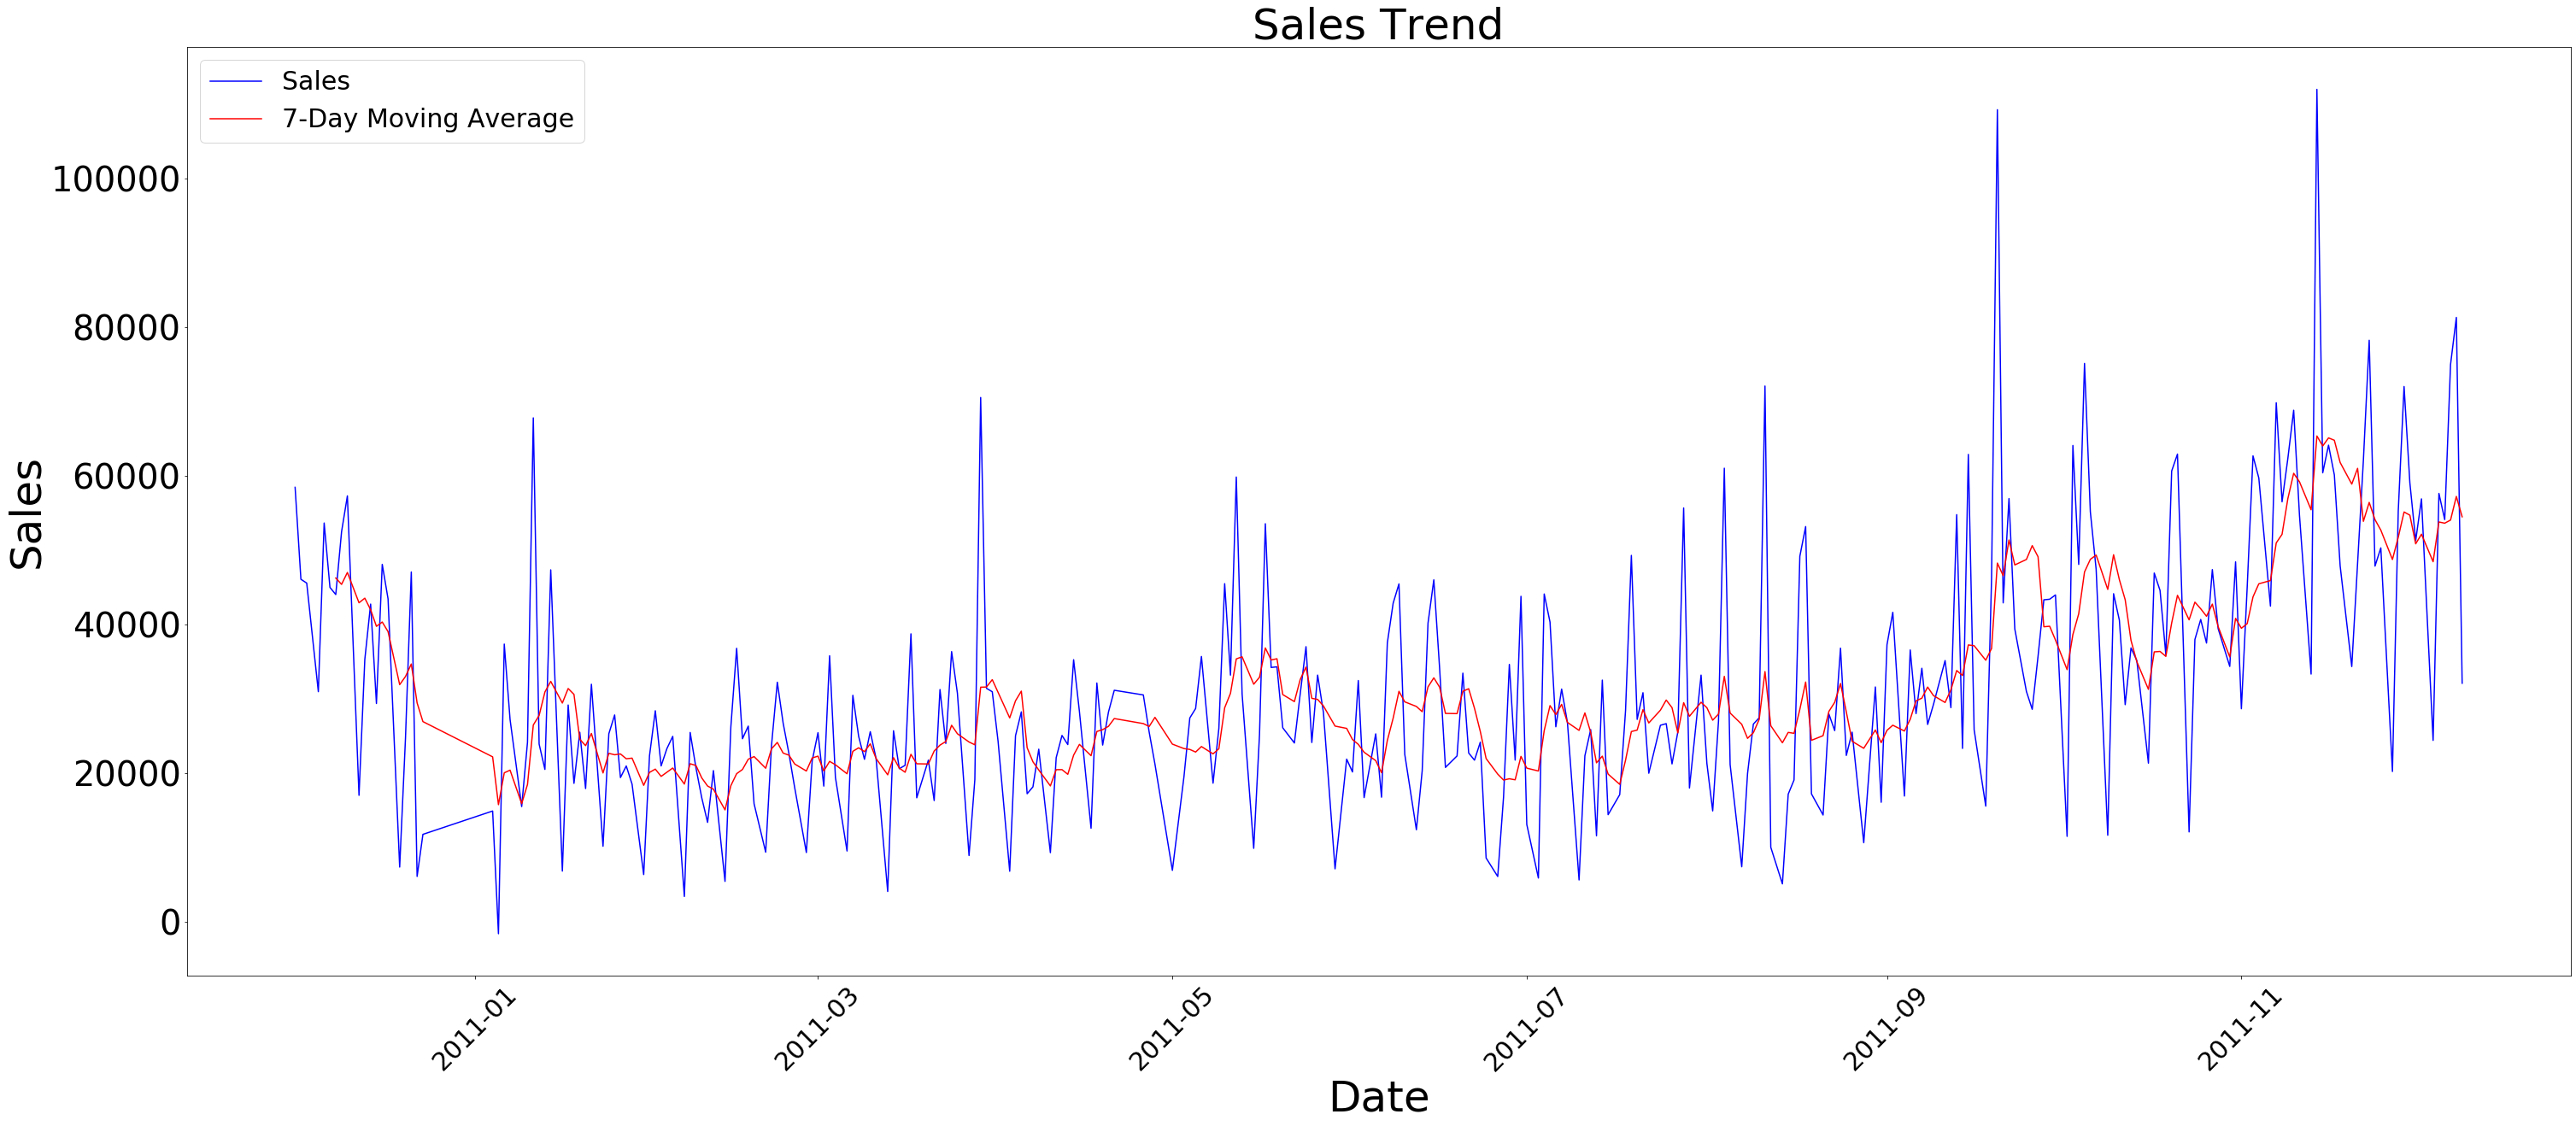

In [24]:
plt.rcParams["figure.figsize"] = (50,20)
plt.plot(sales_trend["date"], sales_trend["sales"], color='blue', label='Sales')
plt.plot(sales_trend["date"], sales_trend["sales_ma7"], color='red', label='7-Day Moving Average')
plt.legend(loc="upper left", fontsize = 30)
plt.title("Sales Trend", fontsize = 50)
plt.ylabel("Sales", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Date", fontsize = 50)
plt.show()

#### Number of Transactions (Normal and Moving Average)

In [25]:
transaction_trend = sales_data.groupby(['date'])['transaction id'].nunique()
transaction_trend = transaction_trend.reset_index()
transaction_trend.columns = ["date", "Transactions"]
transaction_trend['transactions_ma7'] = transaction_trend.iloc[:,1].rolling(window=7).mean()

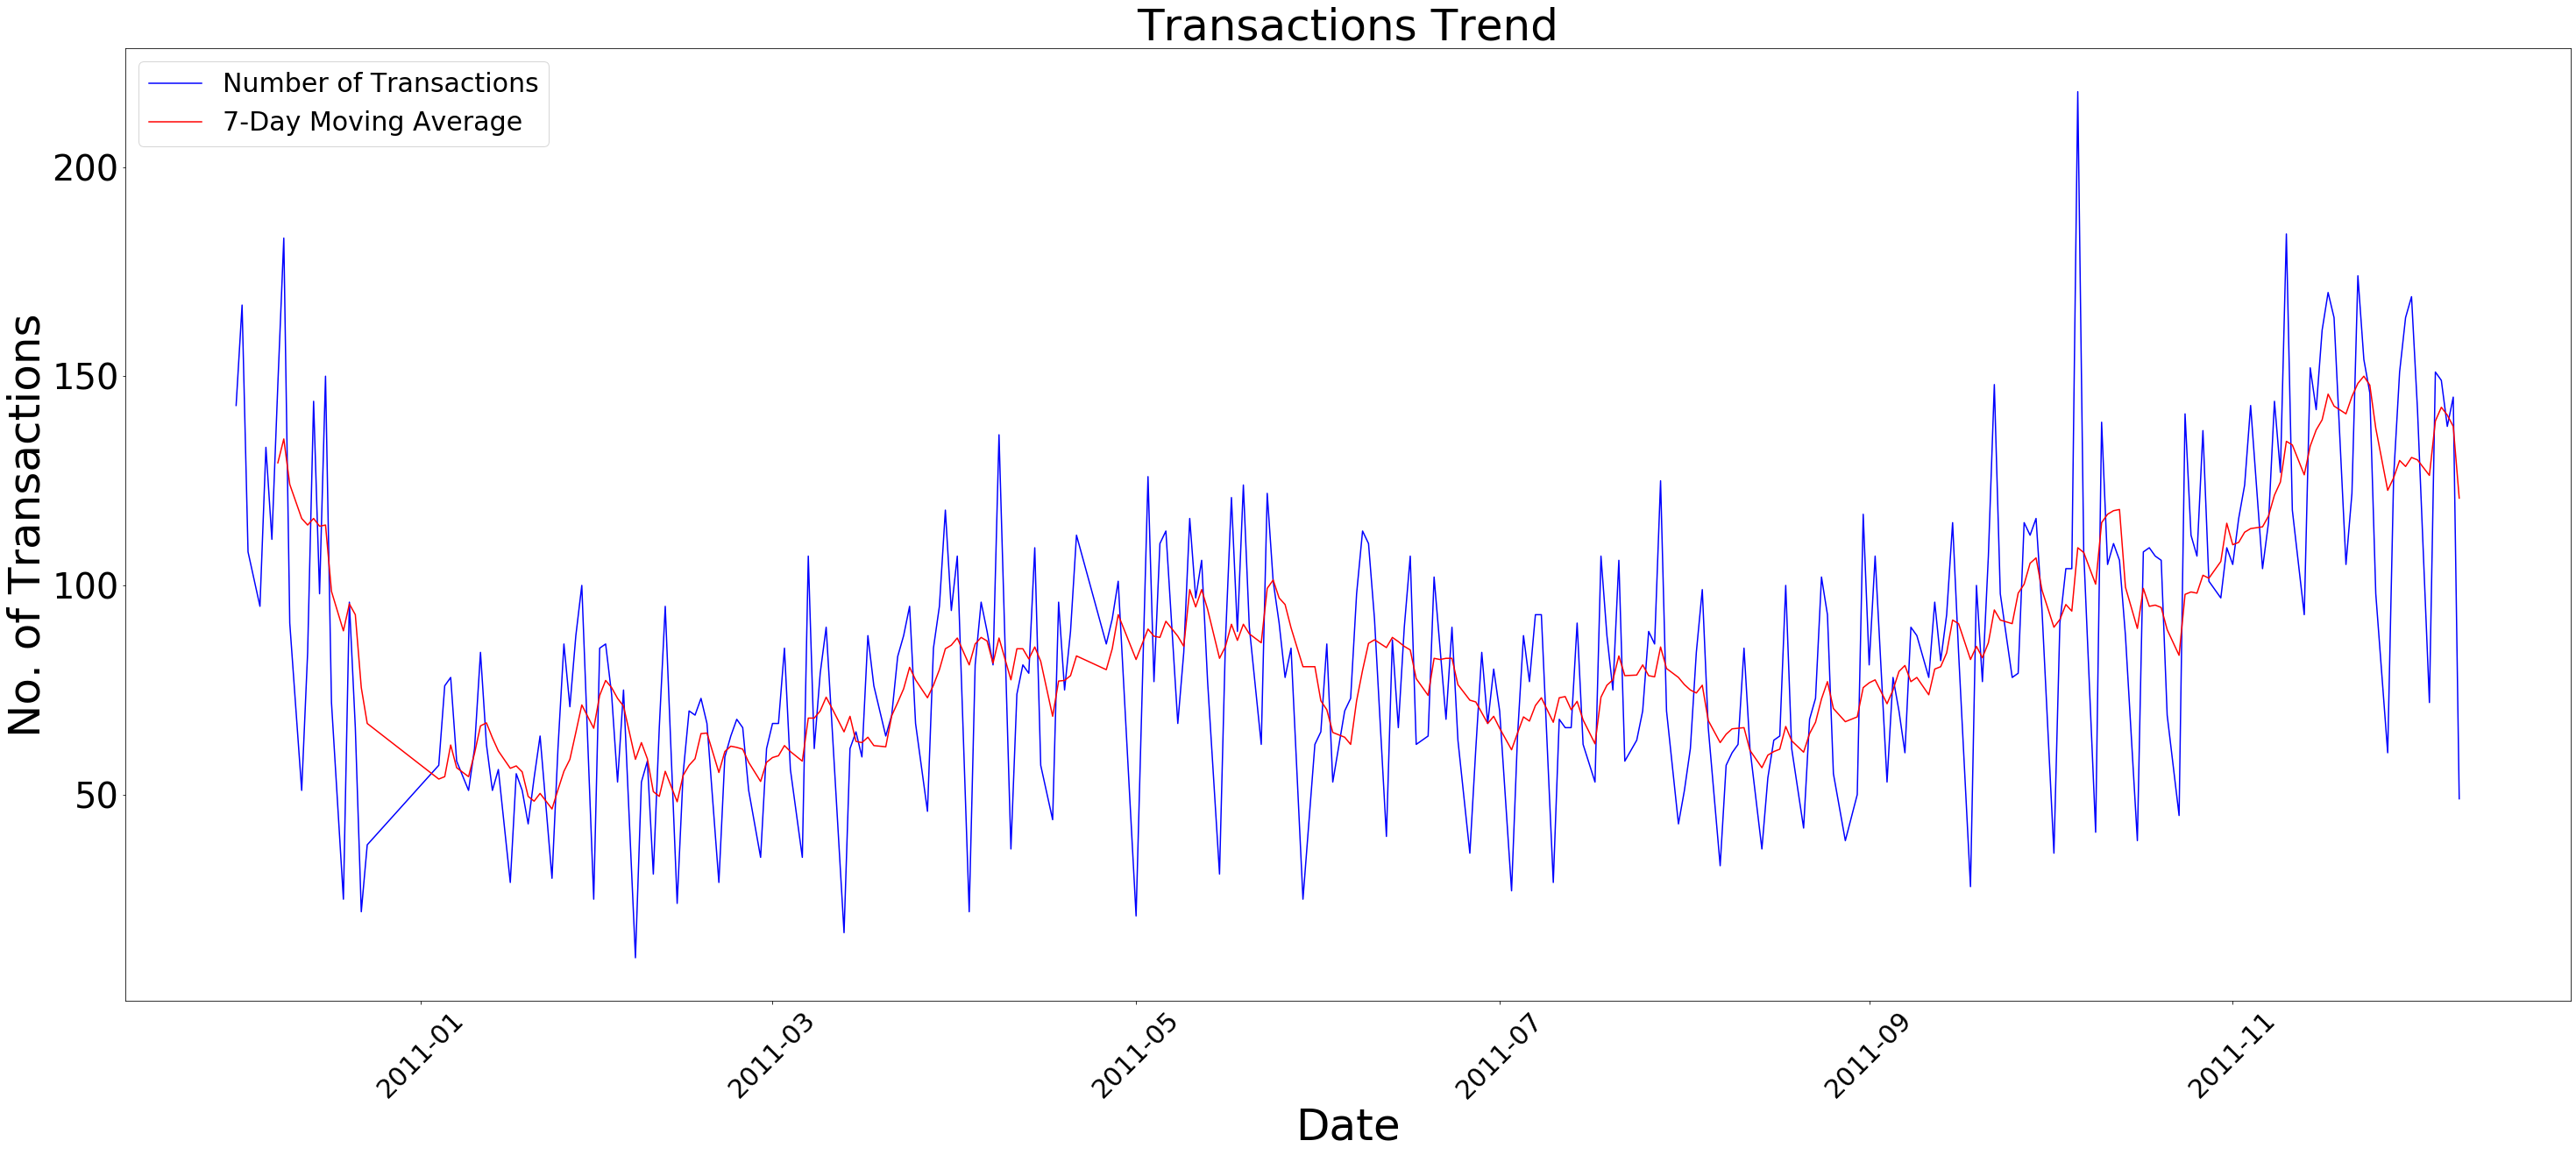

In [26]:
plt.rcParams["figure.figsize"] = (50,20)
plt.plot(transaction_trend["date"], transaction_trend["Transactions"], color='blue', label='Number of Transactions')
plt.plot(transaction_trend["date"], transaction_trend["transactions_ma7"], color='red', label='7-Day Moving Average')
plt.legend(loc="upper left", fontsize = 30)
plt.title("Transactions Trend", fontsize = 50)
plt.ylabel("No. of Transactions", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Date", fontsize = 50)
plt.show()

#### Number of Products sold (Normal and Moving Average)

In [27]:
products_trend = sales_data.groupby(['date'])['product id'].nunique()
products_trend = products_trend.reset_index()
products_trend.columns = ["date", "Products Sold"]
products_trend['products_ma7'] = products_trend.iloc[:,1].rolling(window=7).mean()

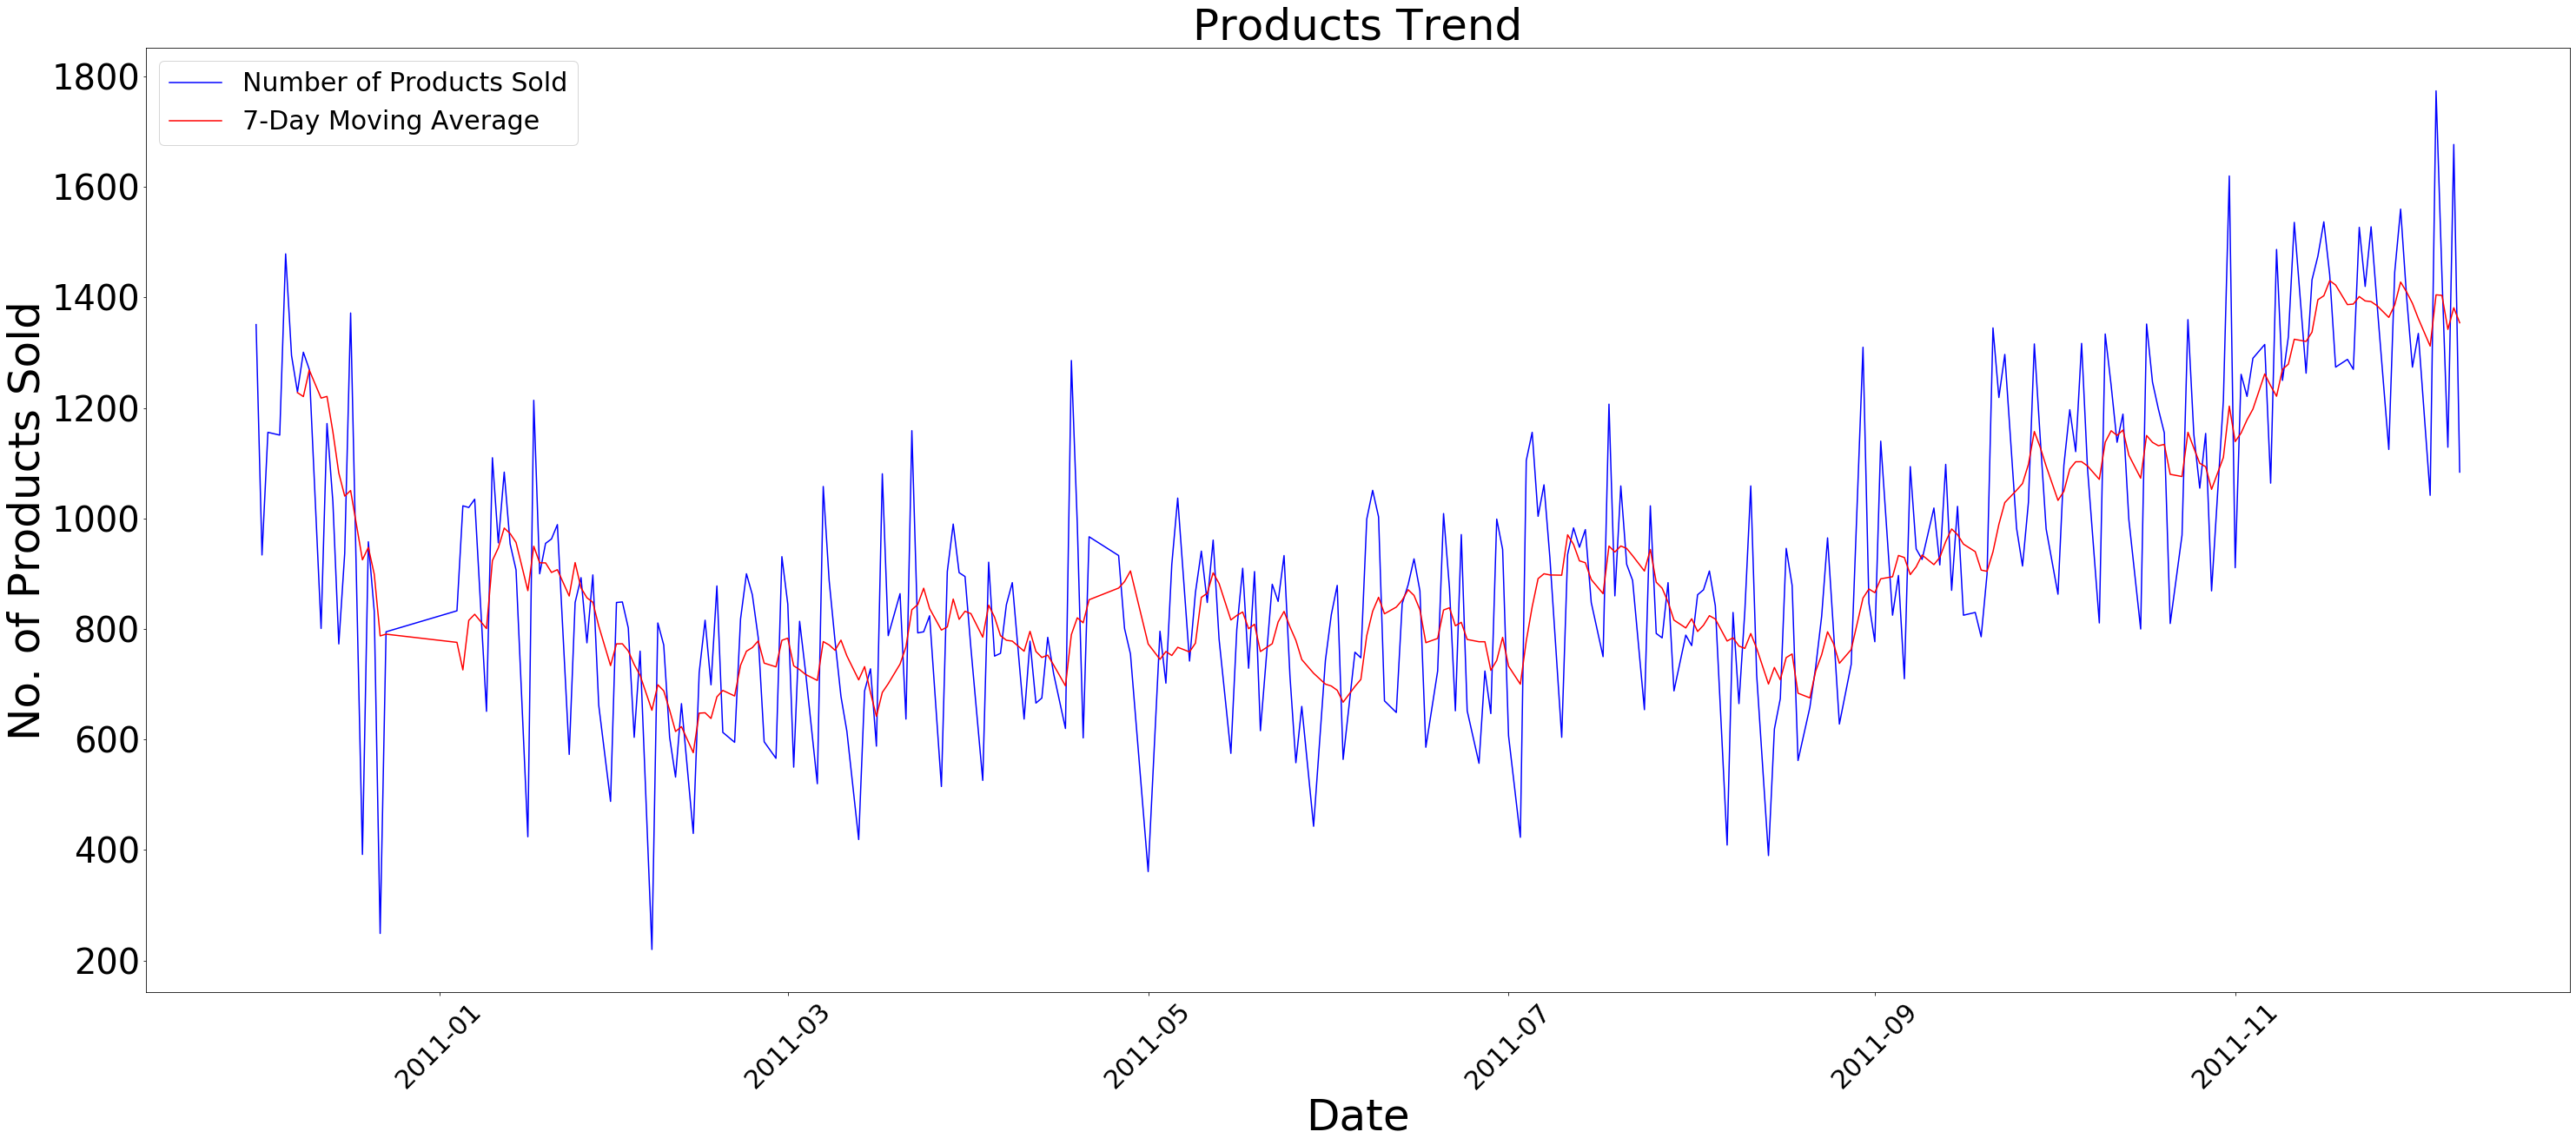

In [28]:
plt.rcParams["figure.figsize"] = (50,20)
plt.plot(products_trend["date"], products_trend["Products Sold"], color='blue', label='Number of Products Sold')
plt.plot(products_trend["date"], products_trend["products_ma7"], color='red', label='7-Day Moving Average')
plt.legend(loc="upper left", fontsize = 30)
plt.title("Products Trend", fontsize = 50)
plt.ylabel("No. of Products Sold", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Date", fontsize = 50)
plt.show()

#### Number of Customers (Normal and Moving Average)

In [29]:
customer_trend = sales_data.groupby(['date'])['customer id'].nunique()
customer_trend = customer_trend.reset_index()
customer_trend.columns = ["date", "customers"]
customer_trend['customers_ma7'] = customer_trend.iloc[:,1].rolling(window=7).mean()

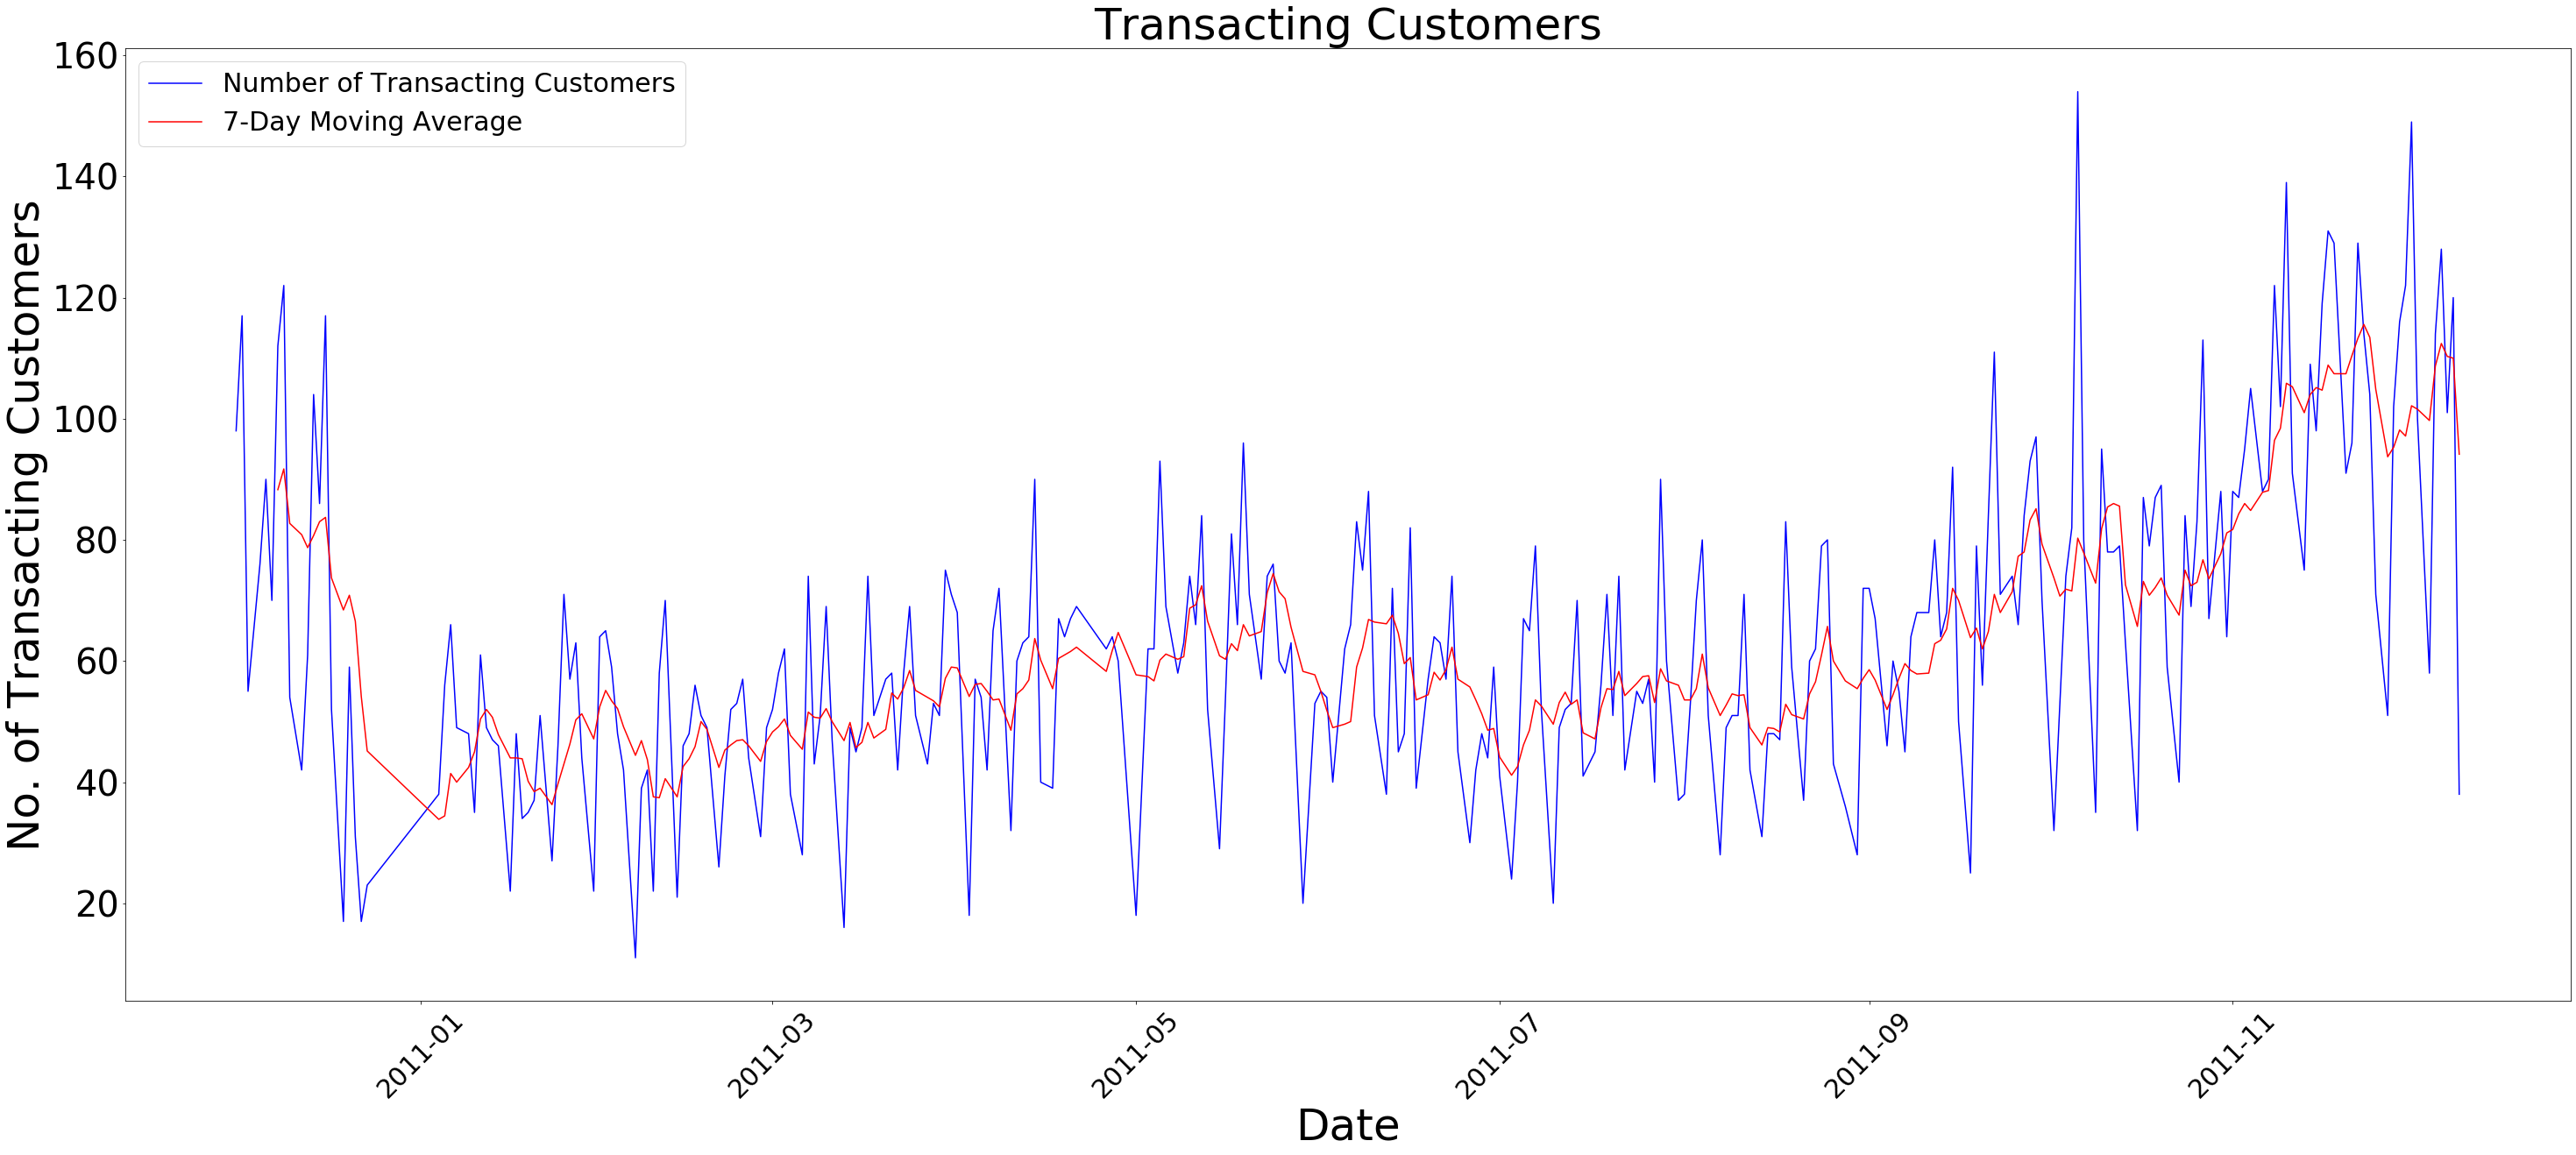

In [30]:
plt.rcParams["figure.figsize"] = (50,20)
plt.plot(customer_trend["date"], customer_trend["customers"], color='blue', label='Number of Transacting Customers')
plt.plot(customer_trend["date"], customer_trend["customers_ma7"], color='red', label='7-Day Moving Average')
plt.legend(loc="upper left", fontsize = 30)
plt.title("Transacting Customers", fontsize = 50)
plt.ylabel("No. of Transacting Customers", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Date", fontsize = 50)
plt.show()

#### Number of Countries per month

In [186]:
country_min_date = sales_data.groupby(['transaction country'])['transaction timestamp'].min()

In [191]:
# sales_data['mnth_yr'] = pd.to_datetime(sales_data['transaction timestamp']).dt.to_period('M')
country_count = sales_data.groupby(['mnth_yr'])['transaction country'].nunique()

# Customer Analysis

In [228]:
customer_counts = sales_data.groupby('customer id').agg(fm=('date','min')).reset_index()
customer_counts

,customer id,fm
0,12346.0,2011-01-18
1,12347.0,2010-12-07
2,12348.0,2010-12-16
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4367,18280.0,2011-03-07
4368,18281.0,2011-06-12
4369,18282.0,2011-08-05
4370,18283.0,2011-01-06


##### Hypothesis
- Customers who have Customer ID are wholesale buyers where as those transactions wothout customer ID are purchases made by the small retailers/customers

#### Comparing transactions with and without Customer ID 

In [31]:
with_cust = sales_data[sales_data['customer id'].notnull()]
without_cust = sales_data[~sales_data['customer id'].notnull()]

In [32]:
withCustUnitsDistribution = with_cust.groupby(['transaction id'])['quantity sold'].sum().reset_index()
withCustUnitsDistribution.columns = ['transaction id', 'number of units sold']
withoutCustUnittsDistribution = without_cust.groupby(['transaction id'])['quantity sold'].sum().reset_index()
withoutCustUnittsDistribution.columns = ['transaction id', 'number of units sold']

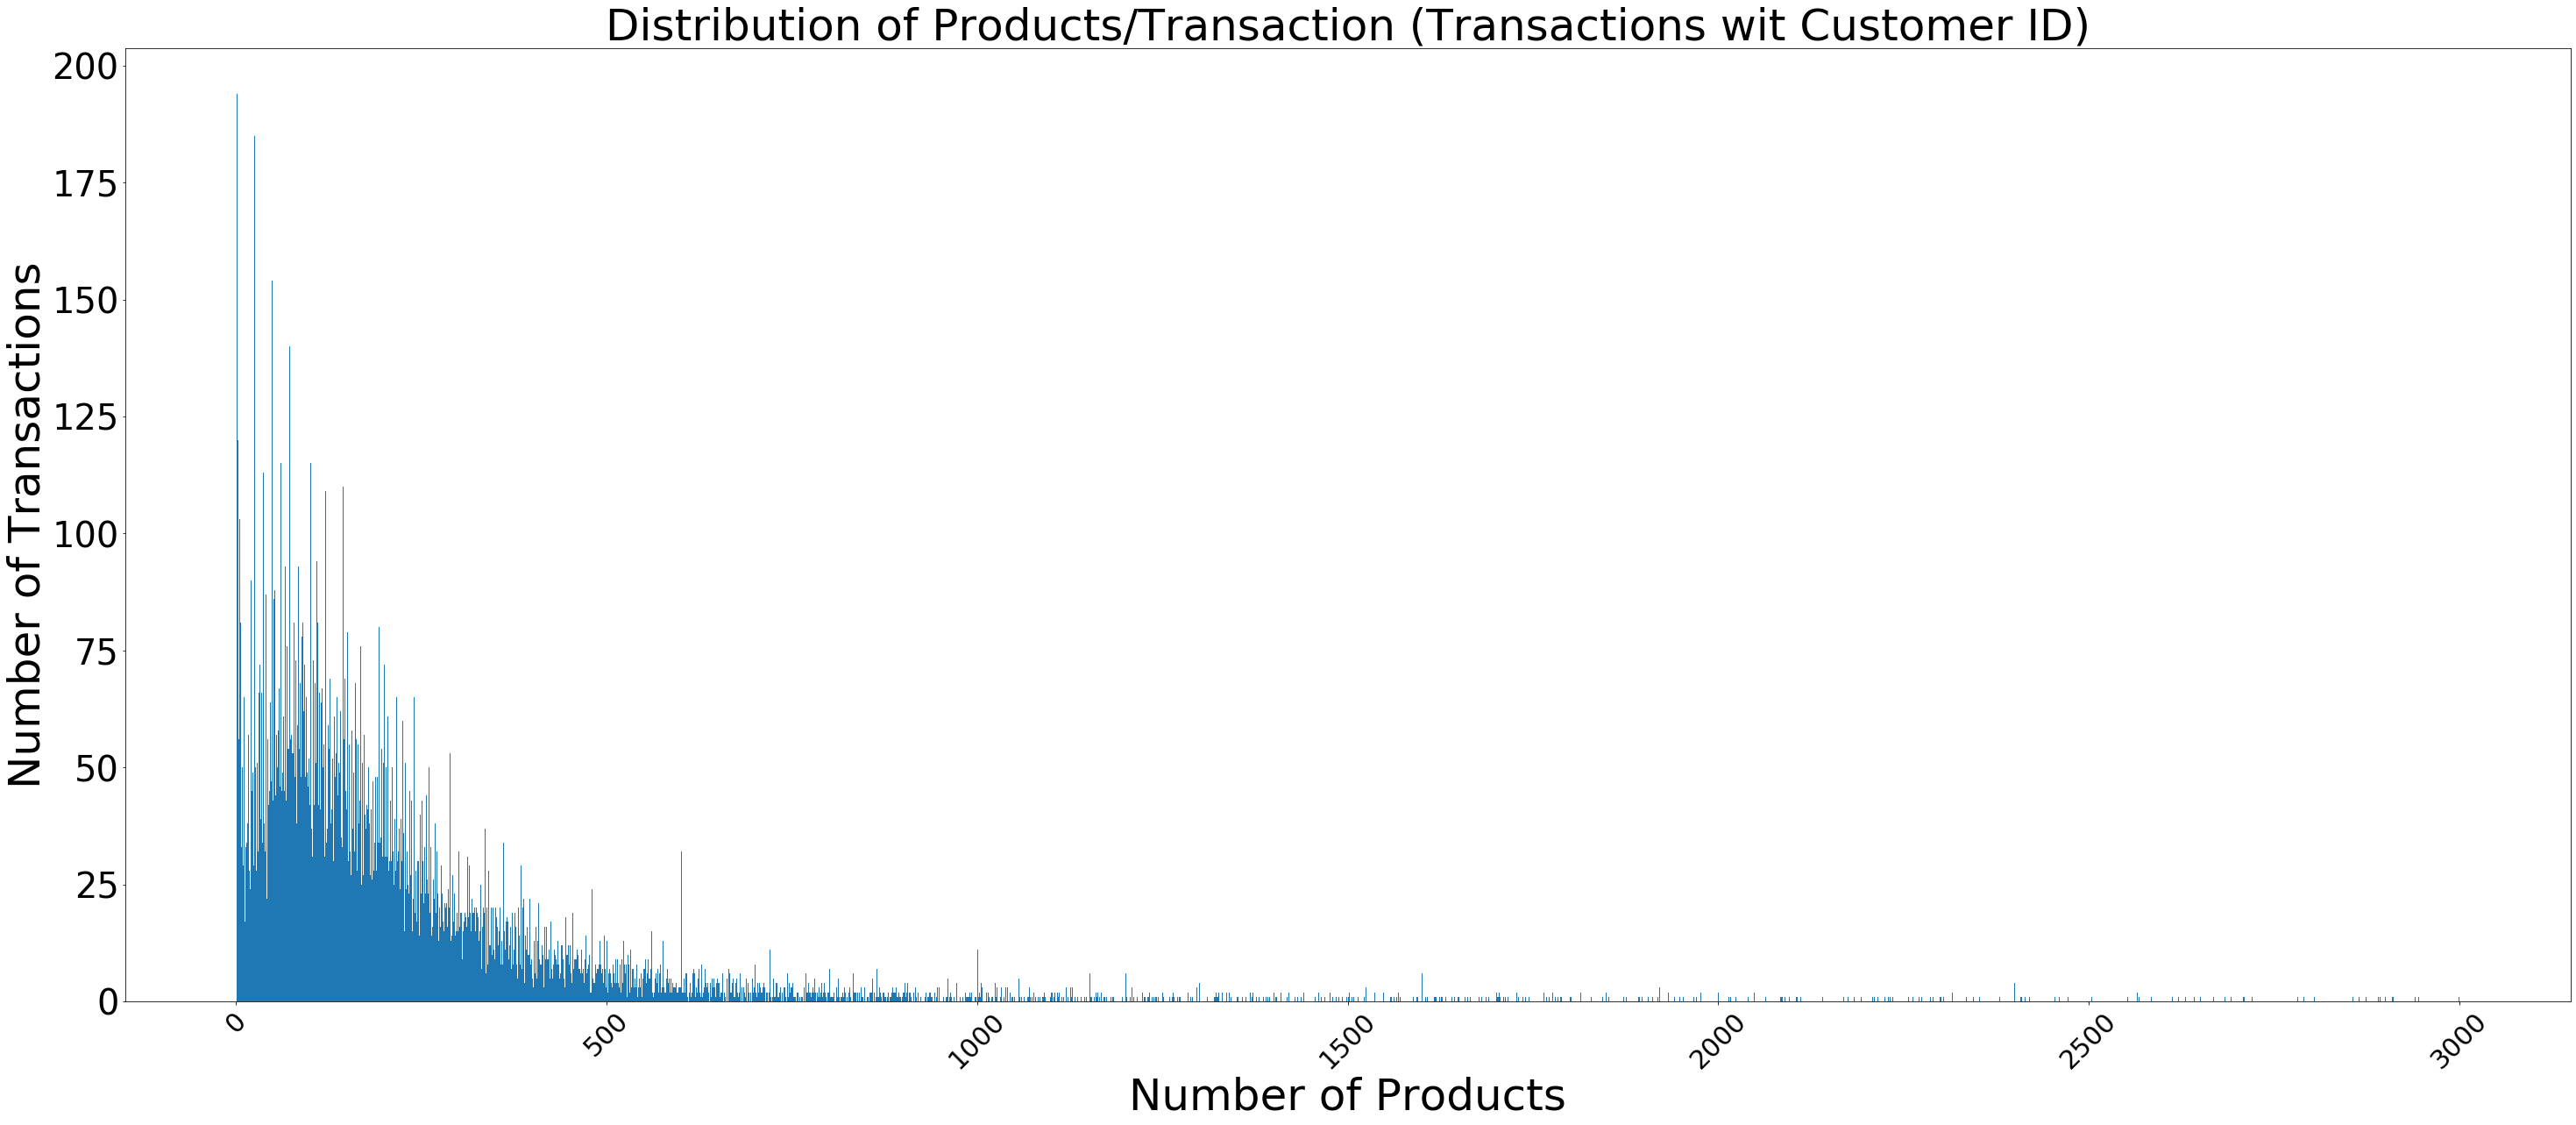

In [88]:
plt.hist(withCustUnitsDistribution['number of units sold'], bins=3000,  range=(0,3000))
plt.title("Distribution of Products/Transaction (Transactions wit Customer ID)", fontsize = 50)
plt.ylabel("Number of Transactions", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Number of Products", fontsize = 50)
plt.show()

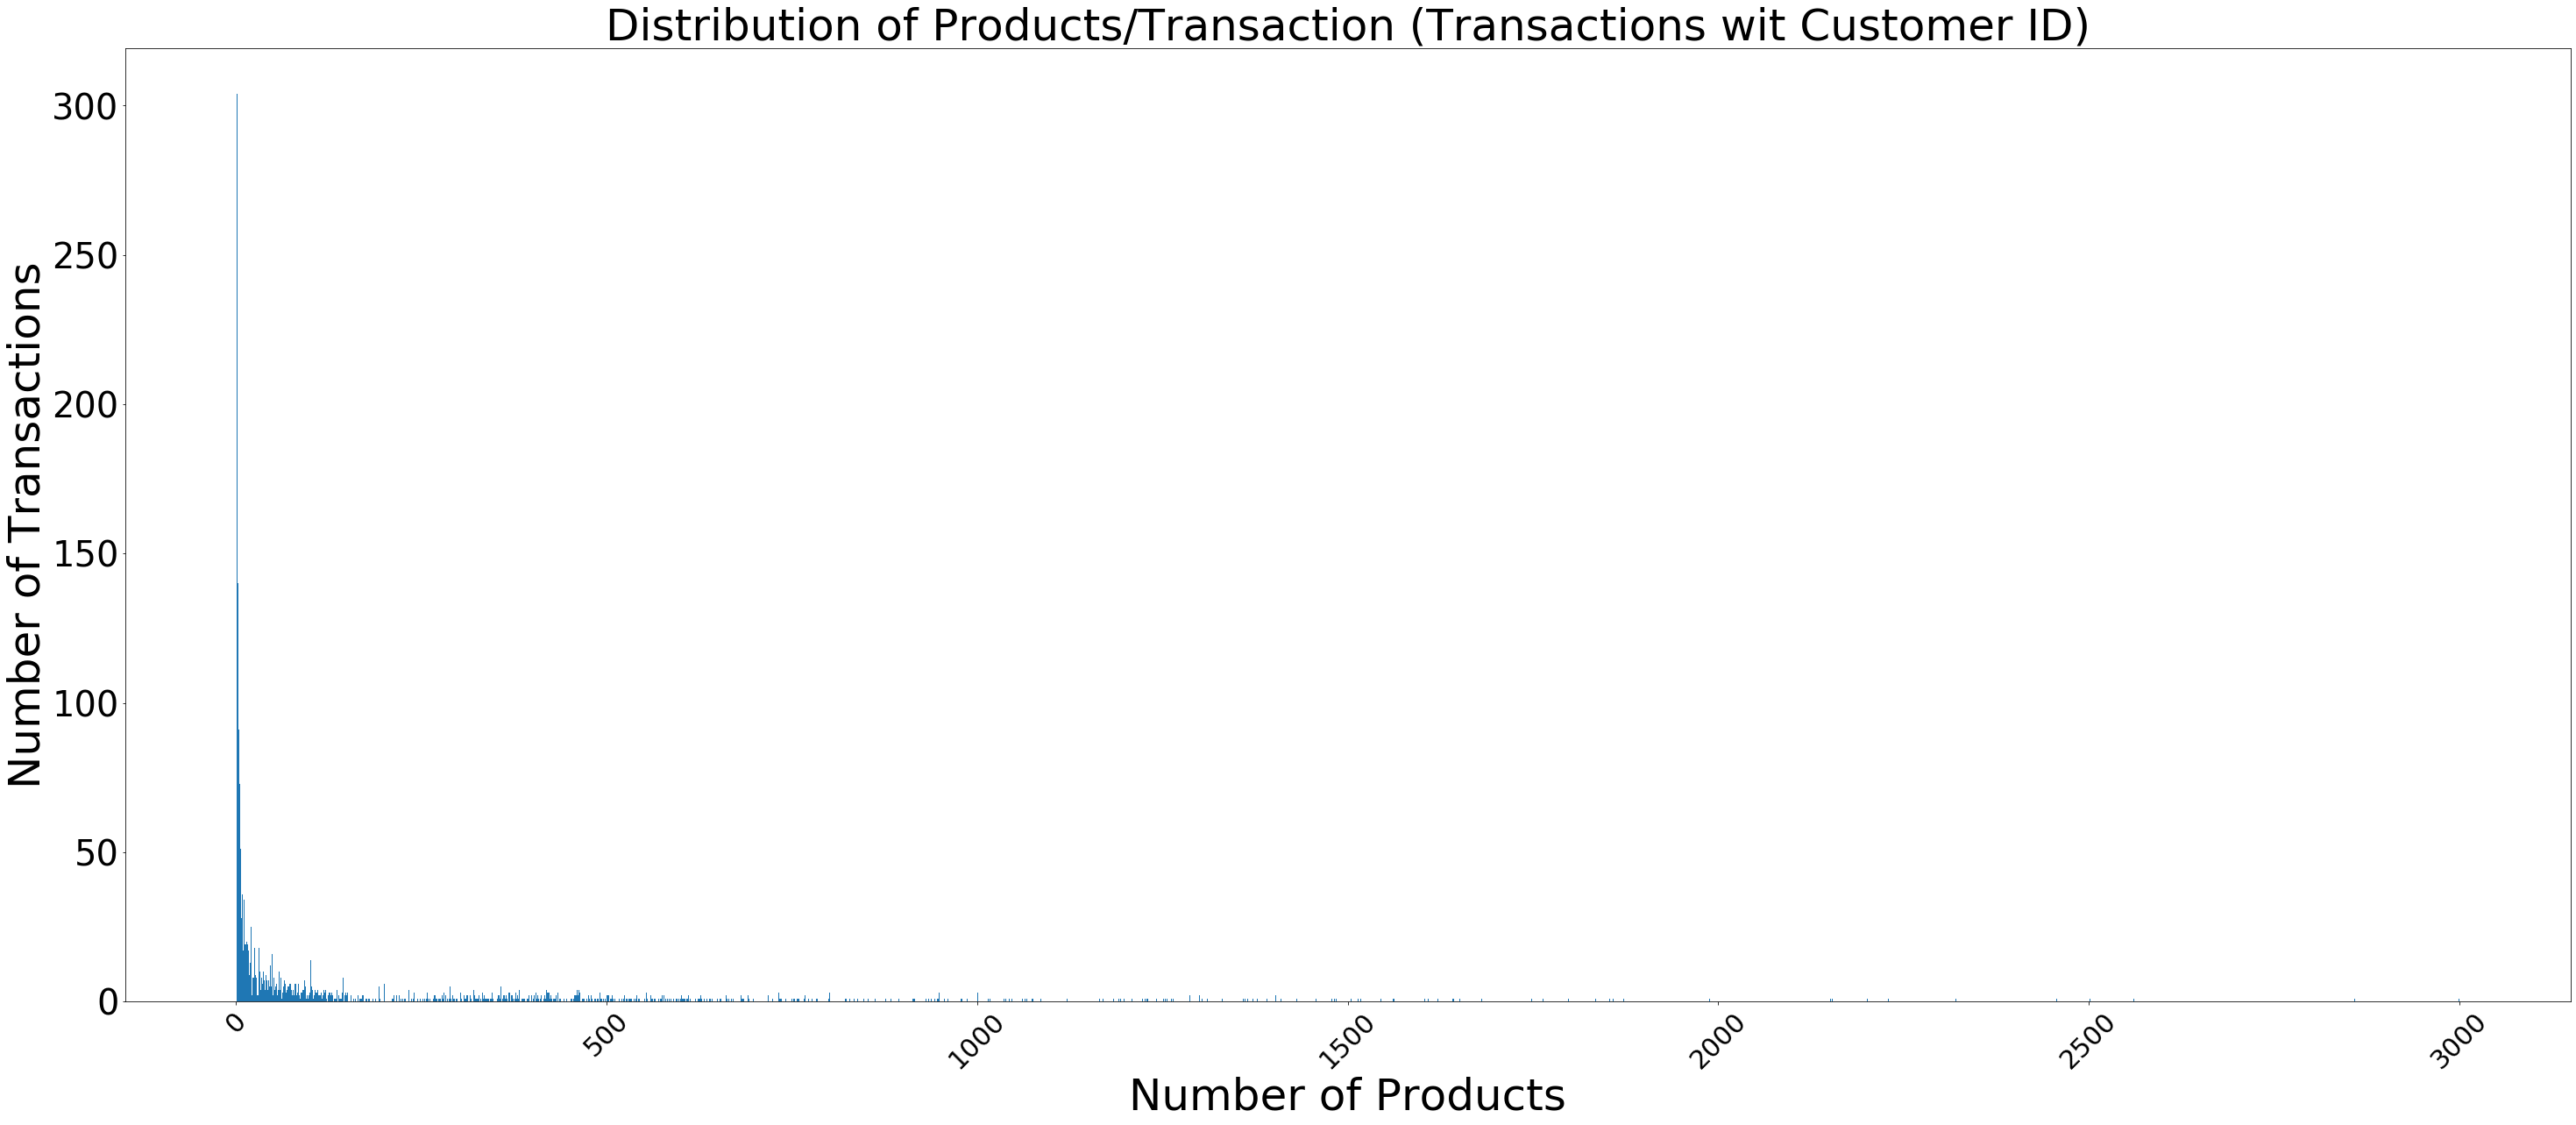

In [89]:
plt.hist(withoutCustUnittsDistribution['number of units sold'], bins=3000,  range=(0,3000))
plt.title("Distribution of Products/Transaction (Transactions wit Customer ID)", fontsize = 50)
plt.ylabel("Number of Transactions", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Number of Products", fontsize = 50)
plt.show()

#### Comparing Net Sales between the 2 groups

In [35]:
print('% of Sales from Transactions with Customer ID: ', round(with_cust['Net Sales'].sum()/sales_data['Net Sales'].sum()*100,2),'%')

% of Sales from Transactions with Customer ID:  85.12 %


#### Comparing Number of Transactions between 2 Groups

In [36]:
print('% of Transactions from Transactions with Customer ID: ', round(with_cust['transaction id'].nunique()/sales_data['transaction id'].nunique()*100,2),'%')

% of Transactions from Transactions with Customer ID:  85.68 %


- The Customers with the Customer ID are probably wholesale buyers as is evident from the distribution charts for both. On an average we can see that Transactions with Customer ID have more units bought per transactions as compared to transactions without Customer ID
- Majority of Transactions and Sales is done by valid Customer IDs. Transactions with no Customer ID amount to only ~15% in both sales and transactions
- As mentioned in the previous section, Customers from UK form a majority of the dataset, amounting to far higher sales and transactions than that from any other country, we will restrict the further analysis on the customers from UK

#### How recent have the customers bought the products ?

In [37]:
# Restricting the Transactions with Customer Id to those from UK  
uk_cust = with_cust[with_cust['transaction country']=='United Kingdom']

In [38]:
uk_cust = uk_cust[(uk_cust['quantity sold']>0)]

In [39]:
max_date = uk_cust['date'].max() + timedelta(days=1)
print(max_date)

2011-12-10


In [40]:
recency = uk_cust.groupby(['customer id']).agg({'date': lambda x: (max_date - x.max()).days}).reset_index()
recency.rename(columns={'date': 'Recency'}, inplace=True)
print(recency.head())
print('{:,} rows; {:,} columns'.format(recency.shape[0], recency.shape[1]))

   customer id  Recency
0      12346.0      326
1      12747.0        3
2      12748.0        1
3      12749.0        4
4      12820.0        4
3,921 rows; 2 columns


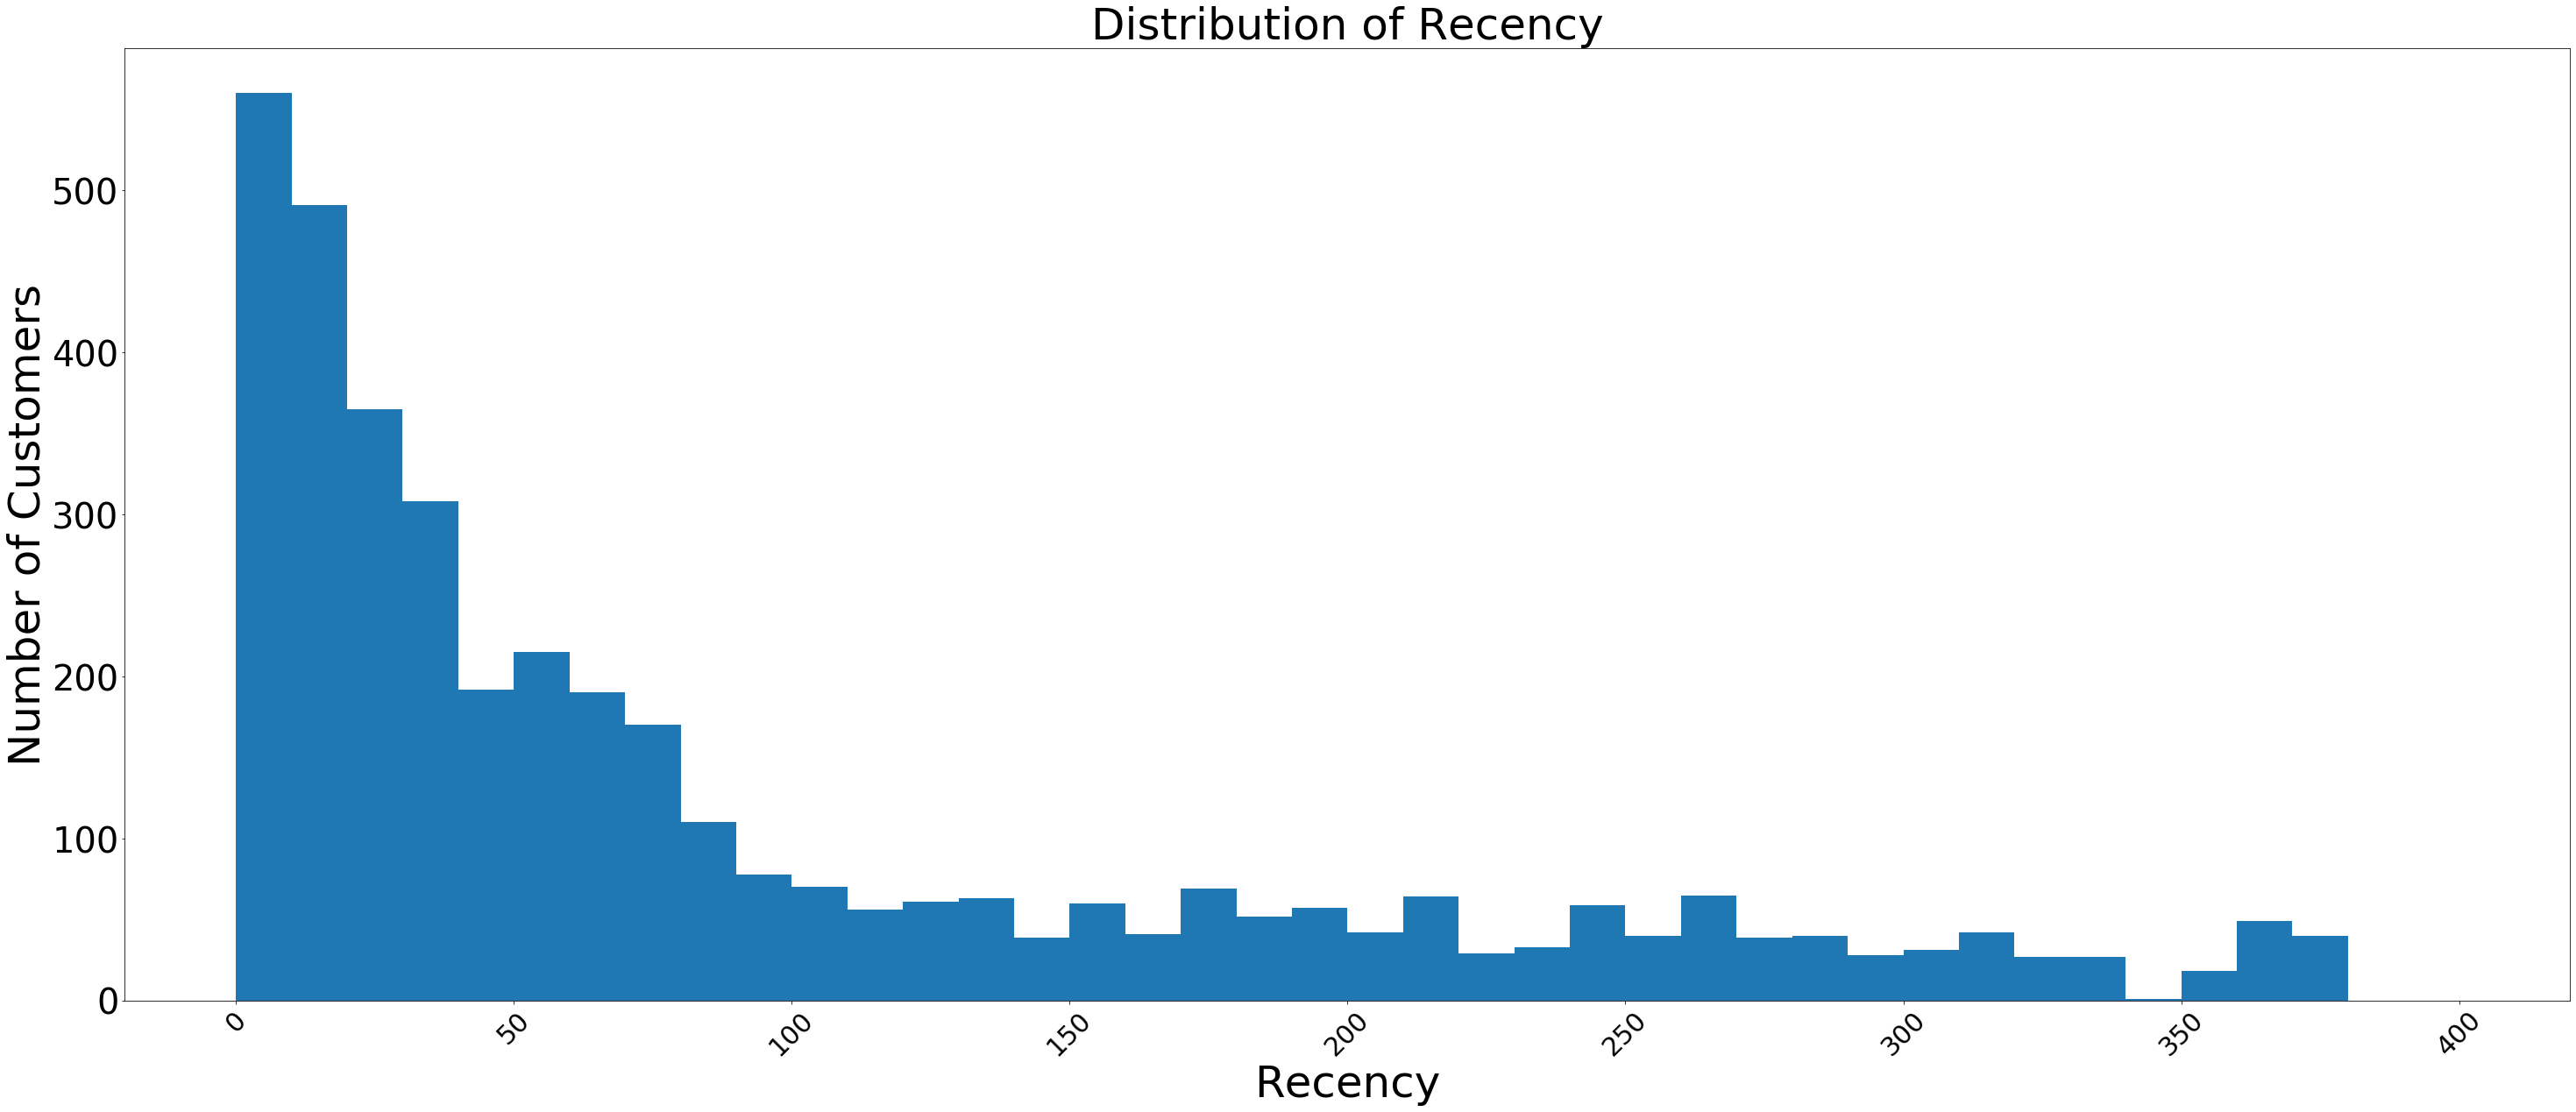

In [41]:
# Distribution of Recency of Customers
plt.hist(recency['Recency'], bins=40,  range=(0,400))
plt.title("Distribution of Recency", fontsize = 50)
plt.ylabel("Number of Customers", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Recency", fontsize = 50)
plt.show()

#### How Frequently are the customers buying ?

In [42]:
frequency = uk_cust.groupby(['customer id'])['transaction id'].nunique().reset_index()
frequency.rename(columns={'transaction id': 'Frequency'}, inplace=True)
print(frequency.head())
print('{:,} rows; {:,} columns'.format(frequency.shape[0], frequency.shape[1]))

   customer id  Frequency
0      12346.0          1
1      12747.0         11
2      12748.0        210
3      12749.0          5
4      12820.0          4
3,921 rows; 2 columns


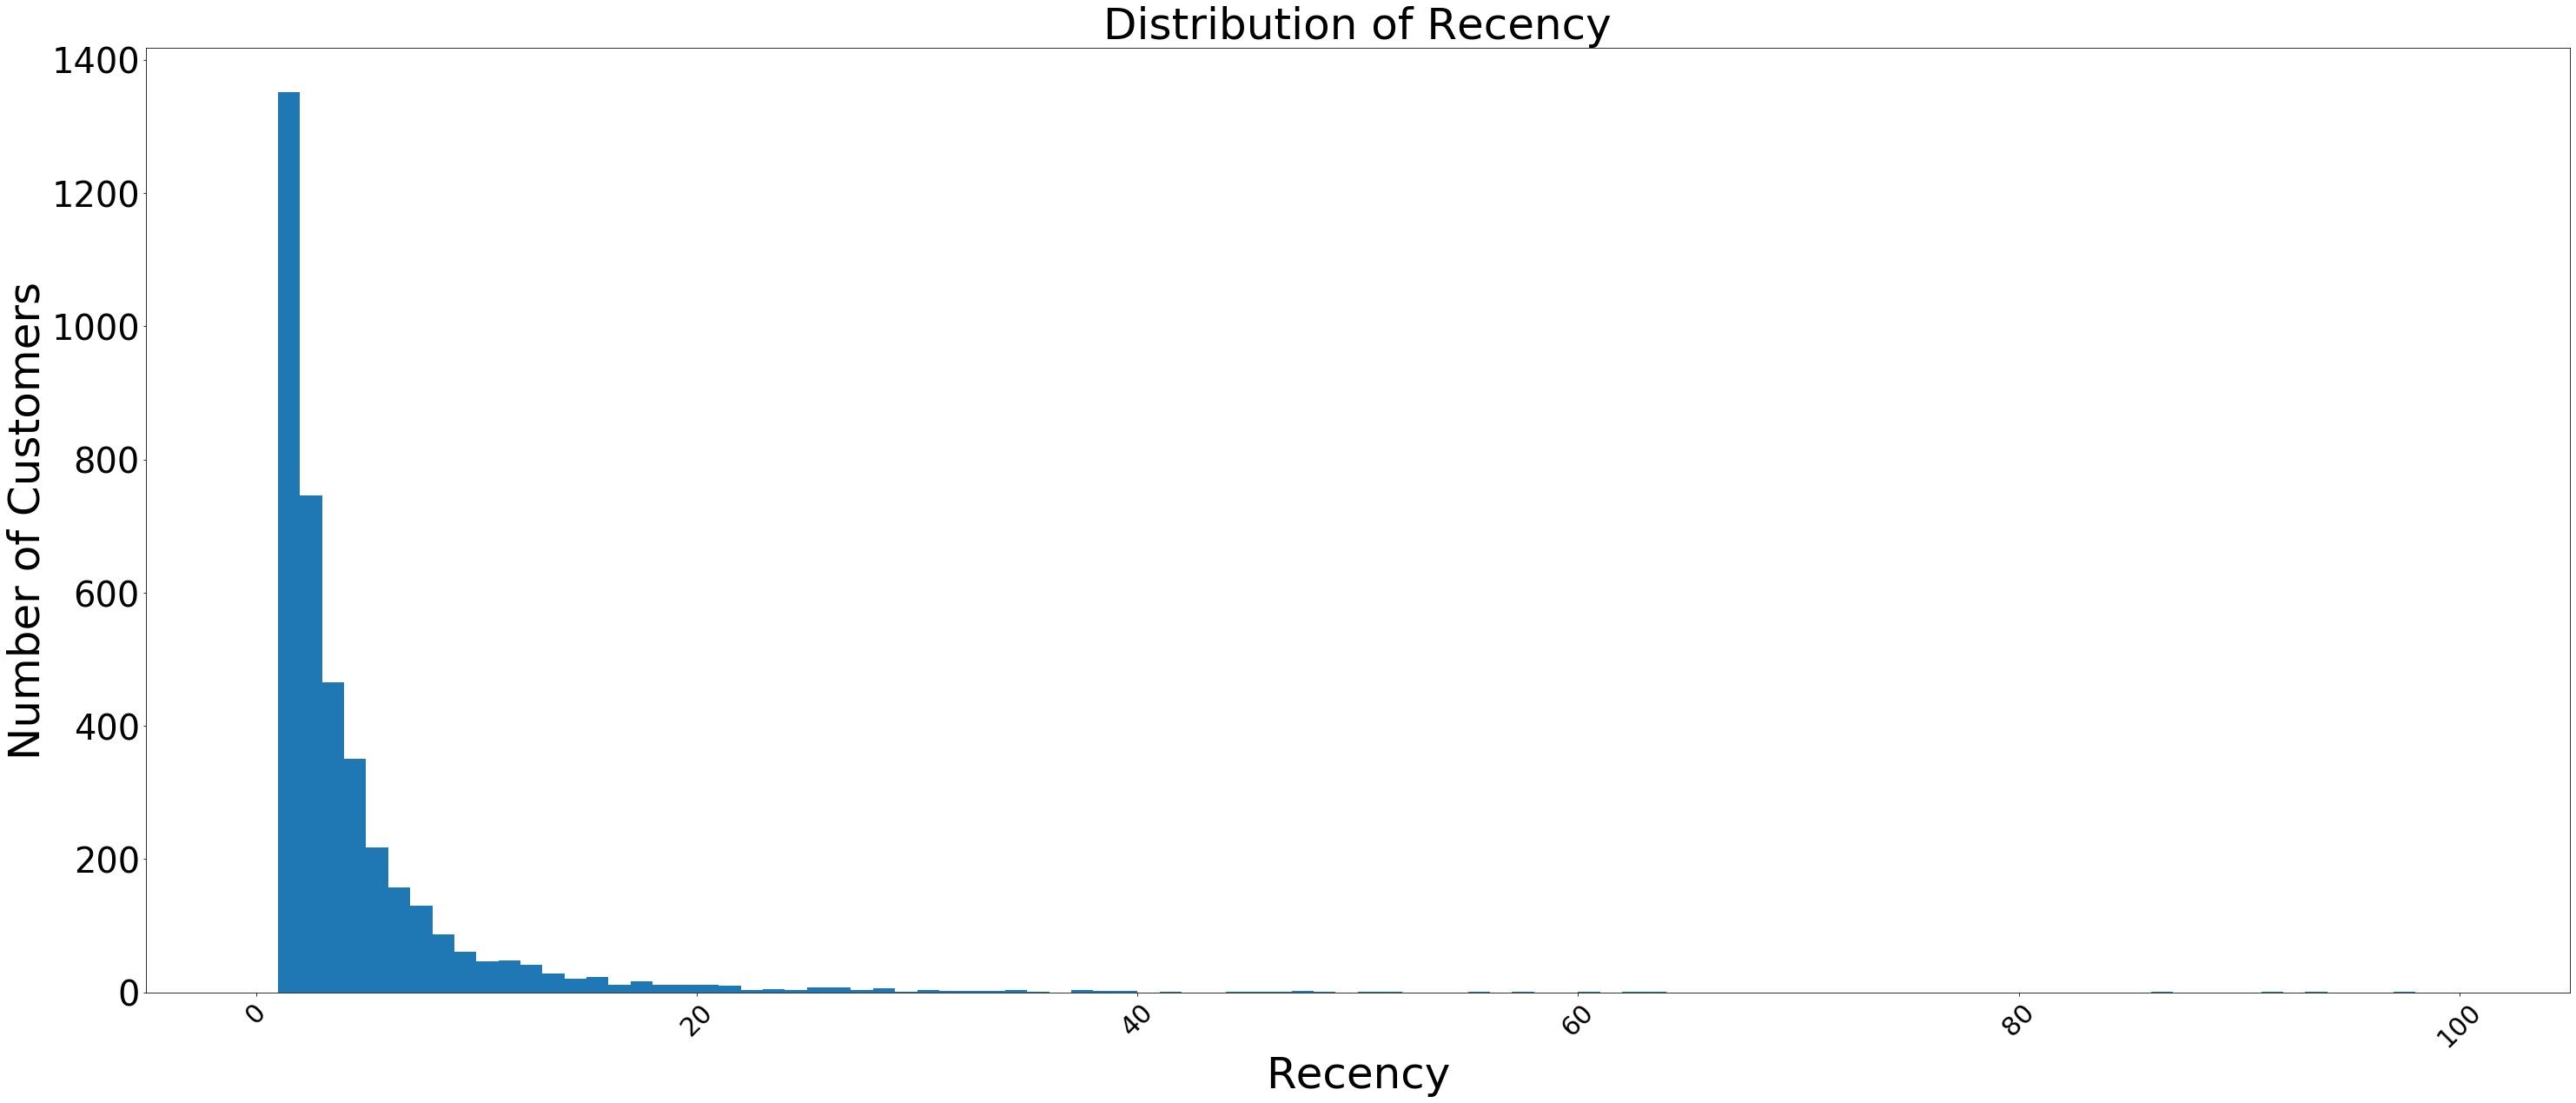

In [43]:
# Distribution of Customer Frequency of Buying
plt.hist(frequency['Frequency'], bins=100,  range=(0,100))
plt.title("Distribution of Recency", fontsize = 50)
plt.ylabel("Number of Customers", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Recency", fontsize = 50)
plt.show()

#### How much are the customers buying ?

In [44]:
monetary = uk_cust.groupby(['customer id'])['Net Sales'].sum().reset_index()
monetary.rename(columns={'Net Sales': 'MValue'}, inplace=True)
print(monetary.head())
print('{:,} rows; {:,} columns'.format(monetary.shape[0], monetary.shape[1]))

   customer id    MValue
0      12346.0  77183.60
1      12747.0   4196.01
2      12748.0  33053.19
3      12749.0   4090.88
4      12820.0    942.34
3,921 rows; 2 columns


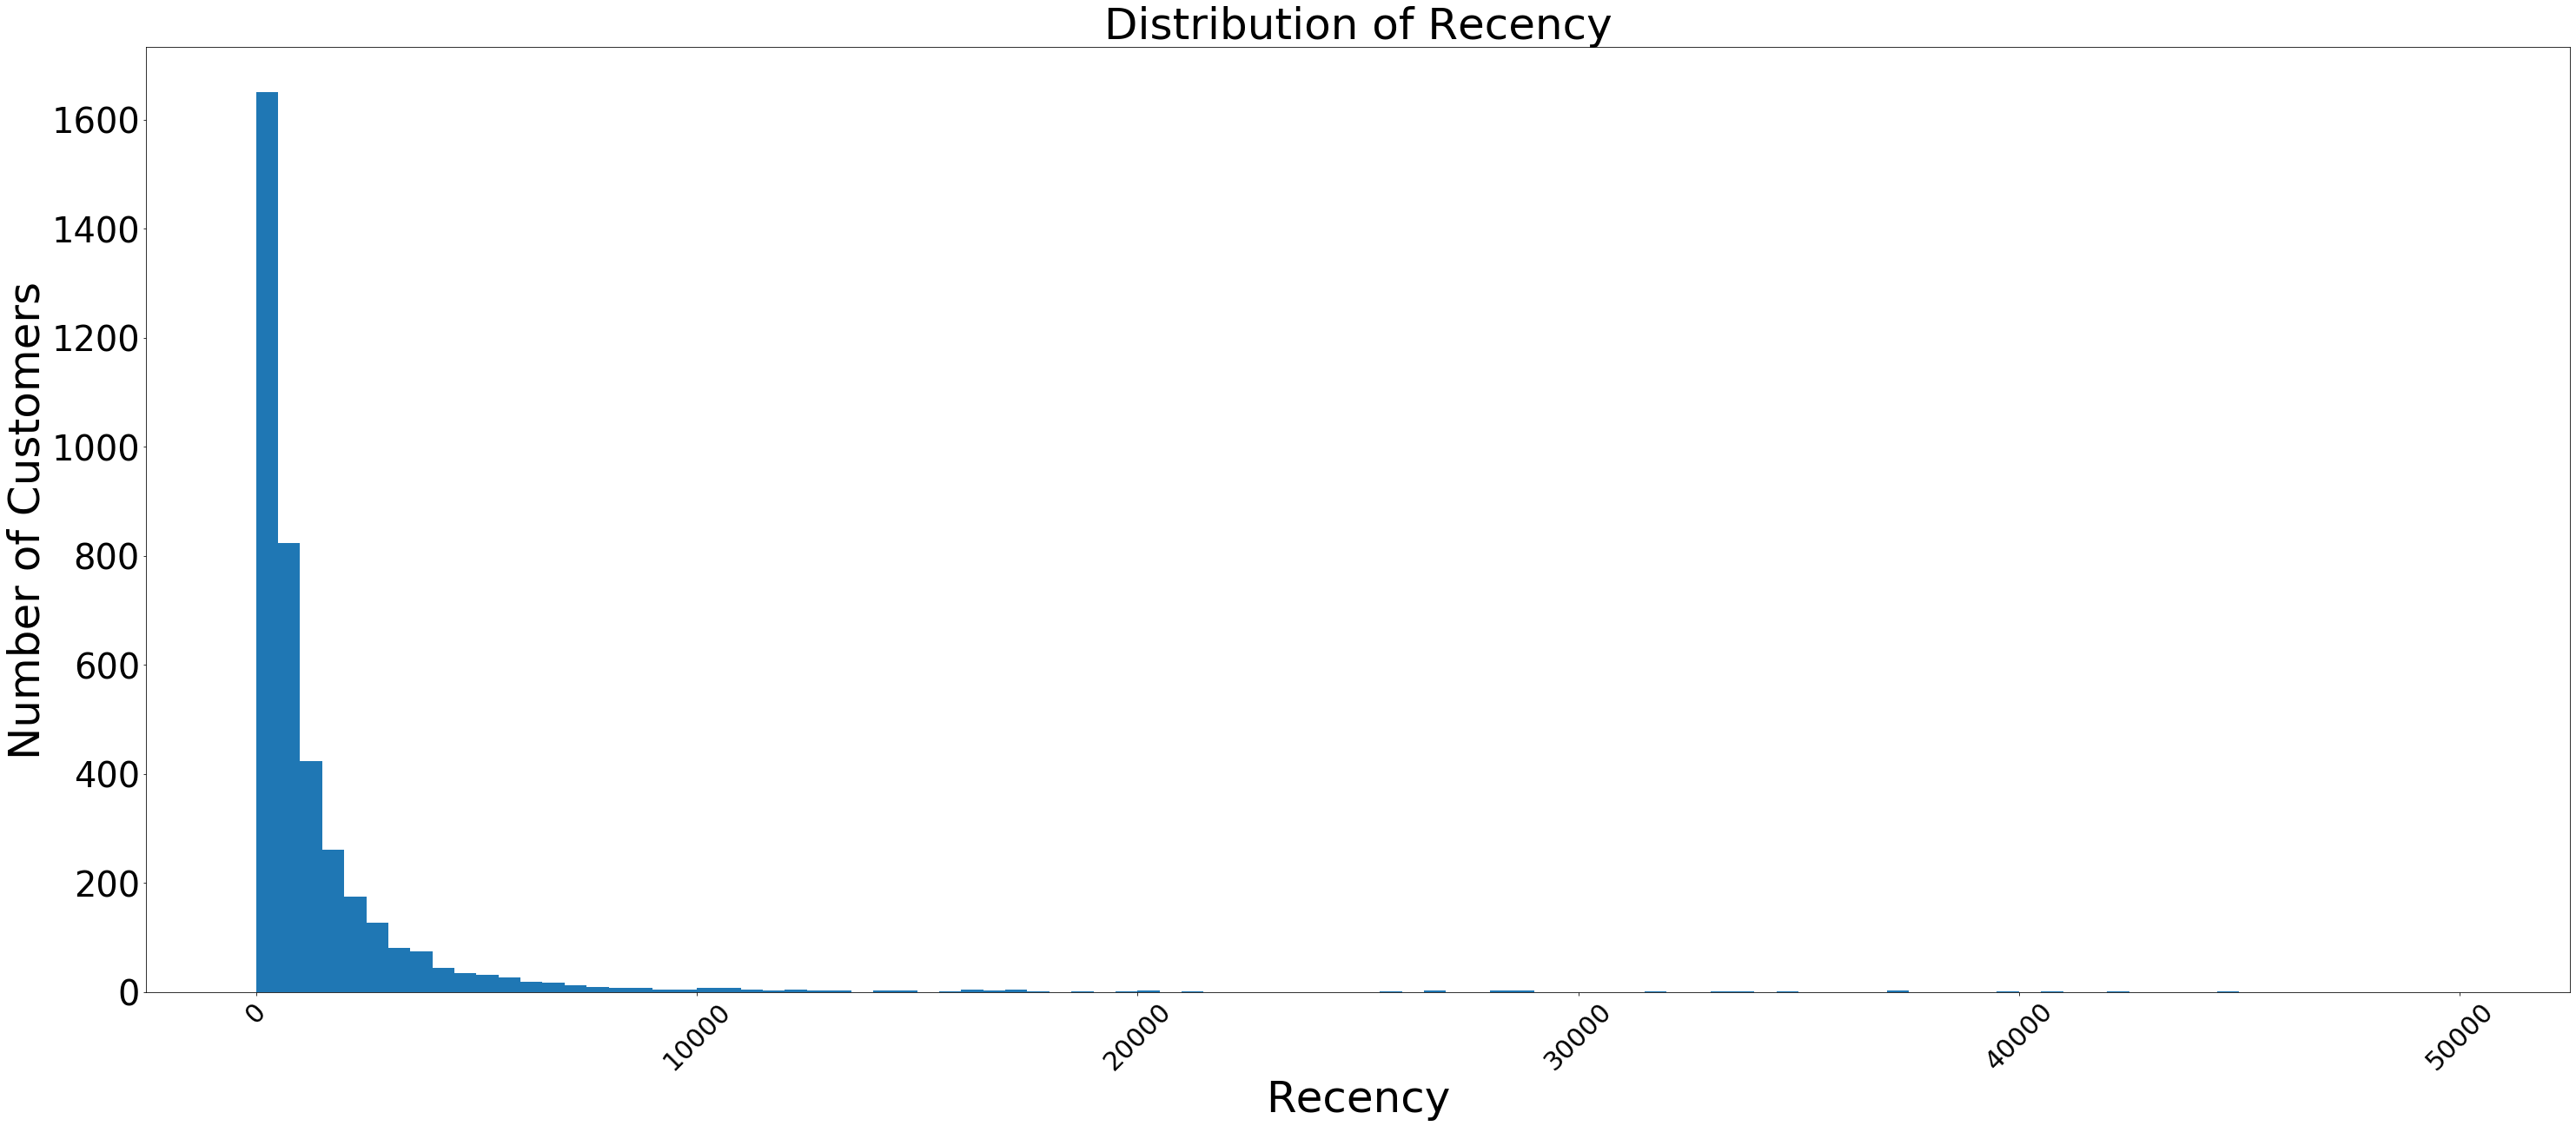

In [45]:
plt.hist(monetary['MValue'], bins=100,  range=(0,50000))
plt.title("Distribution of Recency", fontsize = 50)
plt.ylabel("Number of Customers", fontsize = 50)
plt.xticks(fontsize = 30, rotation = 45)
plt.yticks(fontsize = 40)
plt.xlabel("Recency", fontsize = 50)
plt.show()

Next on the basis of the recency, frequency and Monetary values of the customers for the past 13 months, we can classify the customers based on the quantiles in which they fall into, in each of these metrics

In [46]:
# joining r,f,m, dataframes
from functools import reduce
dfs = [recency, frequency, monetary]
rfm = df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['customer id'], how='inner'), dfs)

In [57]:
rfm['r'] = pd.qcut(rfm['Recency'], 4, [4,3,2,1])
rfm['f'] = pd.qcut(rfm['Frequency'], 2, [1,2])
rfm['m'] = pd.qcut(rfm['MValue'], 4, [1,2,3,4])

In [58]:
rfm['RFM_Score'] = rfm[['r','f','m']].sum(axis=1)

In [59]:
rfm.head()

,customer id,Recency,Frequency,MValue,r,f,m,RFM_Score,RFM_Level
0,12346.0,326,1,77183.60,1,1,4,6.0,Loyal
1,12747.0,3,11,4196.01,4,2,4,10.0,Potential
2,12748.0,1,210,33053.19,4,2,4,10.0,Potential
3,12749.0,4,5,4090.88,4,2,4,10.0,Potential
4,12820.0,4,4,942.34,4,2,3,9.0,Potential


#### Dividing thee customers based on the rfm value and the total rfm score

- Dormant Customers: Customers who have made a transaction only once, and that too not very recently (f=1 and r=3,4)
- Potential Customers: Customers who have less frequency(1,2) but have made comparitively recent purchases (f=1 and r=1,2)
- High Value: Customers who have higher purchase frequency along with high Monetary value very recently (f=2, Score>8)
- Loyal Customers:Customers who have higher purchase frequency and moderate overall score (f=2, Score <8 & >=6)
- Need Attention: Customers who have higher purchase frequency and low overall score (f=2, Score<6)

In [93]:
def rfm_level(df):
    if ((df['f'] == 1) and (df['r'] < 3)):
        return 'Dormant'
    elif ((df['f'] == 1) and (df['r'] >= 3)):
        return 'Potential'
    elif ((df['f'] == 2) and (df['RFM_Score'] >= 8)):
        return 'High Value'
    elif ((df['f'] == 2) and (df['RFM_Score'] < 8) and (df['RFM_Score'] >=6)):
        return 'Loyal'
    elif ((df['f'] == 2) and (df['RFM_Score'] < 6)):
        return 'Need Attention'

# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,customer id,Recency,Frequency,MValue,r,f,m,RFM_Score,RFM_Level
0,12346.0,326,1,77183.60,1,1,4,6.0,Dormant
1,12747.0,3,11,4196.01,4,2,4,10.0,High Value
2,12748.0,1,210,33053.19,4,2,4,10.0,High Value
3,12749.0,4,5,4090.88,4,2,4,10.0,High Value
4,12820.0,4,4,942.34,4,2,3,9.0,High Value


In [94]:
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

               Recency Frequency  MValue      
                  mean      mean    mean count
RFM_Level                                     
Dormant          184.6       1.3   469.3  1433
High Value        24.2       8.7  4090.4  1385
Loyal             98.8       4.0  1186.6   379
Need Attention   188.0       3.4   366.0    60
Potential         25.3       1.5   716.2   664


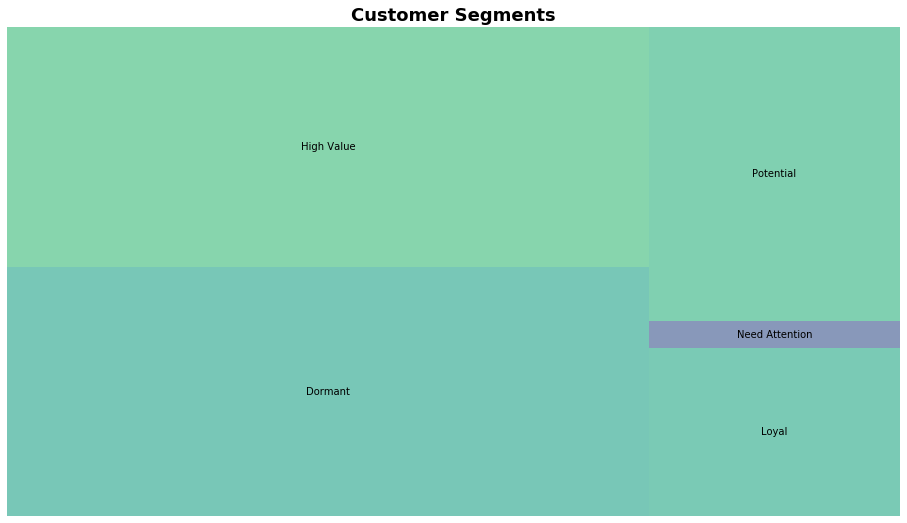

In [113]:
import squarify

rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Dormant',
                     'High Value',
                     'Loyal',
                     'Need Attention',
                     'Potential',
                     ], alpha=.6 )
plt.title("Customer Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()


### Treatment of Different Customers based on the Segments
- High Value Customers: No need of an action to be taken. These customers continue to be our best customers making high monetary purchases very frequently
- Loyal Customers: Customers who are very consistant with their purchases but with moderate to high overall scores. We can provide these customers with some benefits, like the loyalty discounts to convert them to High Value customers
- Potential: These customers made some recent purchases but very less, have a huge potential. Targetting them differently with some promotional offers can bring this class of customers to loyal/high value customers
- Dormant: These customers probably had a bad customer experience, and have probably shifted to competition. These customers need different reactivation strategies to bring them back onboard    

### Repeat Buyers, New Buyers

# Product Analysis

#### Most selling products in UK

In [144]:
sales_uk = sales_data[~sales_data['transaction id'].astype(str).str.contains('C')]
sales_uk = sales_uk[sales_uk['transaction country']=='United Kingdom']
sales_uk = sales_uk.groupby(['product id']).agg({
                                                'quantity sold': 'sum',
                                                'Net Sales': 'sum'
})
sales_uk = sales_uk.reset_index()
sales_uk.columns = ["product id", "quantity", "sales"]
top_products = sales_uk.sort_values('sales',ascending = False)

In [ ]:
agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MValue': ['mean', 'count']
})

In [132]:
sales_uk_merged=sales_data.merge(rfm, left_on='customer id', right_on='customer id', how='left')
sales_uk_merged = sales_uk_merged[~sales_uk_merged['transaction id'].astype(str).str.contains('C')]
sales_uk_merged = sales_uk_merged[sales_uk_merged['transaction country']=='United Kingdom']

In [149]:
top_products_hv_cust=sales_uk_merged[(sales_uk_merged['RFM_Level']=='Loyal') | (sales_uk_merged['RFM_Level']=='High Value')].groupby('product id').agg({
    'quantity sold': 'sum',
    'Net Sales': 'sum'
}).sort_values('Net Sales', ascending=False)
top_products_hv_cust.reset_index()
top_products_hv_cust.columns = ["quantity","sales"]

- Top products in UK are also the most bought products by the Loyal and High Value Customer Groups 

#### How Frequently is a product bought

In [159]:
prd_frequency = sales_uk_merged.groupby(['product id'])['transaction id'].nunique().reset_index()
prd_frequency.rename(columns={'product id': 'Frequency'}, inplace=True)
print(prd_frequency.head())
print('{:,} rows; {:,} columns'.format(prd_frequency.shape[0], prd_frequency.shape[1]))

  Frequency  transaction id
0     10002              60
1     10080              24
2     10120              28
3     10125              78
4     10133             190
4,055 rows; 2 columns


#### Market Basket Analysis

In [164]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [168]:
market_basket = sales_data[~sales_data['transaction id'].astype(str).str.contains('C')]
market_basket = market_basket[market_basket['transaction country']=='United Kingdom'].groupby(['transaction id', 'product description'])['quantity sold']
market_basket = market_basket.sum().unstack().reset_index().fillna(0).set_index('transaction id')

In [184]:
market_basket.shape

(18668, 4188)

In [171]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [172]:
market_basket = market_basket.applymap(encode_data)

In [180]:
market_basket.shape

(18668, 4188)

In [174]:
itemsets = apriori(market_basket, min_support=0.03, use_colnames=True)

,support,itemsets
0,0.045800,(6 RIBBONS RUSTIC CHARM)
1,0.031123,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.040336,(60 TEATIME FAIRY CAKE CASES)
3,0.046925,(ALARM CLOCK BAKELIKE GREEN)
4,0.035140,(ALARM CLOCK BAKELIKE PINK)


In [179]:
itemsets

,support,itemsets
0,0.045800,(6 RIBBONS RUSTIC CHARM)
1,0.031123,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.040336,(60 TEATIME FAIRY CAKE CASES)
3,0.046925,(ALARM CLOCK BAKELIKE GREEN)
4,0.035140,(ALARM CLOCK BAKELIKE PINK)
...,...,...
126,0.030534,"(JUMBO BAG BAROQUE BLACK WHITE, JUMBO BAG RED..."
127,0.042051,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
128,0.035194,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
129,0.037390,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)"


In [177]:
rules = association_rules(itemsets, metric="lift", min_threshold=0.5)